## 1. DATA EXPLORATION 

## Passo 1: Importar as bibliotecas necessárias

In [186]:
# Importando a biblioteca pandas para manipulação de dados
import pandas as pd
# Importando a biblioteca numpy para operações numéricas
import numpy as np
# Importando a biblioteca seaborn para visualização de dados
import seaborn as sns
# Importando a biblioteca matplotlib para criação de gráficos
import matplotlib.pyplot as plt
# Importando funções de scikit-learn para divisão de dados, busca em grade e validação cruzada
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# Importando ferramentas de pré-processamento de dados de scikit-learn
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Importando SimpleImputer de scikit-learn para imputação de dados faltantes
from sklearn.impute import SimpleImputer 
# Importando o classificador de árvore de decisão de scikit-learn
from sklearn.tree import DecisionTreeClassifier 
# Importando o classificador K-Nearest Neighbors de scikit-learn
from sklearn.neighbors import KNeighborsClassifier 
# Importando métricas de avaliação de modelos de scikit-learn
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, auc, f1_score
# Importando SMOTE de imbalanced-learn para balanceamento de classes
from imblearn.over_sampling import SMOTE
# Importando classificadores ensemble de scikit-learn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Importando o classificador de rede neural de scikit-learn
from sklearn.neural_network import MLPClassifier
# Importando a regressão logística de scikit-learn
from sklearn.linear_model import LogisticRegression
# Importando Counter da biblioteca collections
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
# Importando o classificador de vetores de suporte de scikit-learn
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
# Importando SMOTE de imbalanced-learn para balanceamento de classes
from imblearn.over_sampling import SMOTE

## Passo 2:  Carregar o dataset

In [187]:
# Importando a biblioteca os para interações com o sistema operacional
import os
os.chdir("/Users/catarinadias/Desktop")
# Lendo o dataset CSV usando pandas
data = pd.read_csv('hcc_dataset.csv')

## Passo 3: Analisar os dados

## 3.1 Dimensões do data set (linhas, colunas): neste caso, tem 165 linhas e 50 colunas

In [188]:
# Obtendo a dimensão do dataset
data.shape

(165, 50)

## 3.2 5 primeiras linhas do data set 

In [189]:
# Exibindo as primeiras linhas do dataset
data.head()


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives


## 3.3 5 últimas linhas do data set

In [190]:
# Exibindo as últimas linhas do dataset
data.tail()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,Dies
164,Male,Yes,Yes,No,No,No,Yes,Yes,No,Yes,...,462,6.6,3.95,5,8.5,19.8,?,?,?,Dies


## 3.4 Contagem de valores não nulos de cada coluna e os tipos de dados das mesmas 

In [191]:
# Obtendo um resumo informativo sobre o dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

## 3.5 Verificar se existem linhas duplicadas, mneste caso nao existem.

In [192]:
# Verificando a existência de dados duplicados
data.duplicated().sum()

0

## 3.6 Número de variáveis por coluna

In [193]:
# Contando o número de valores únicos por coluna
data.nunique()

Gender              2
Symptoms            3
Alcohol             2
HBsAg               3
HBeAg               3
HBcAb               3
HCVAb               3
Cirrhosis           2
Endemic             3
Smoking             3
Diabetes            3
Obesity             3
Hemochro            3
AHT                 3
CRI                 3
HIV                 3
NASH                3
Varices             3
Spleno              3
PHT                 3
PVT                 3
Metastasis          3
Hallmark            3
Age                51
Grams_day          20
Packs_year         31
PS                  5
Encephalopathy      3
Ascites             3
INR                88
AFP               133
Hemoglobin         72
MCV               129
Leucocytes        106
Platelets         132
 Albumin           42
Total_Bil          63
ALT                94
AST               108
GGT               140
ALP               125
TP                 47
Creatinine         85
Nodules             7
Major_Dim          69
Dir_Bil   

## 3.7 Estatísticas descritivas transpostas

In [194]:
# Gerando estatísticas descritivas para as colunas numéricas
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,165.0,64.690909,13.319534,20.0,57.0,66.0,74.0,93.0


## 3.8 Visualizar os histogramas das colunas numéricas

In [195]:
from sklearn.utils import resample

# Carregar o dataset
file_path = '/Users/catarinadias/Desktop/hcc_dataset.csv'
data = pd.read_csv(file_path)

# Verificar e corrigir o nome das colunas para remover espaços extras
data.columns = data.columns.str.strip()

# Identificar colunas numéricas e categóricas
colunas_numericas = [
    'ALP', 'TP', 'Creatinine', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 
    'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin', 
    'Age', 'Grams_day', 'Packs_year', 'Nodules'
]
colunas_categoricas = [
    'Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 
    'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 
    'PHT', 'PVT', 'Metastasis', 'Hallmark', 'PS', 'Encephalopathy', 'Ascites', 'Class'
]

# Substituir '?' por NaN
data.replace('?', pd.NA, inplace=True)

# Converter colunas numéricas para o tipo adequado e tratar valores ausentes
for col in colunas_numericas:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        media = data[col].mean()
        data[col].fillna(media, inplace=True)

# Tratar valores ausentes nas colunas categóricas
for col in colunas_categoricas:
    if col in data.columns:
        moda = data[col].mode()[0]
        data[col].fillna(moda, inplace=True)

# Converter colunas categóricas usando LabelEncoder
label_encoders = {}
for col in colunas_categoricas:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le

# Identificar colunas com possíveis outliers
colunas_com_outliers = ['ALP', 'AFP', 'Leucocytes', 'GGT', 'Dir_Bil']

# Aplicar transformação logarítmica nas colunas com possíveis outliers
for col in colunas_com_outliers:
    data[col] = np.log1p(data[col])

# Balancear as classes por sobremostragem da classe minoritária
data_majority = data[data['Class'] == 1]
data_minority = data[data['Class'] == 0]

data_minority_upsampled = resample(data_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=123) # reproducible results

data_balanced = pd.concat([data_majority, data_minority_upsampled])

# Verificar correlação entre as variáveis numéricas
correlacao = data_balanced[colunas_numericas].corr()

# Identificar colunas com alta correlação (acima de 0.8)
correlacao_alta = correlacao.abs().unstack().sort_values(kind="quicksort", ascending=False)
correlacao_alta = correlacao_alta[correlacao_alta >= 0.8]
correlacao_alta = correlacao_alta[correlacao_alta != 1.0].drop_duplicates()

# Remover uma das colunas em pares altamente correlacionados
colunas_para_remover = set()
for col1, col2 in correlacao_alta.index:
    colunas_para_remover.add(col2)

# Escalonar as variáveis numéricas restantes
colunas_numericas_reduzidas = [col for col in colunas_numericas if col not in colunas_para_remover]
scaler = StandardScaler()
data_balanced[colunas_numericas_reduzidas] = scaler.fit_transform(data_balanced[colunas_numericas_reduzidas])

# Resultado final
data_final = data_balanced.drop(columns=list(colunas_para_remover))

# Salvar o dataset tratado
data_final.to_csv('hcc_dataset_tratado.csv', index=False)

print("Processamento concluído. O dataset tratado foi salvo como 'hcc_dataset_tratado.csv'.")


Processamento concluído. O dataset tratado foi salvo como 'hcc_dataset_tratado.csv'.


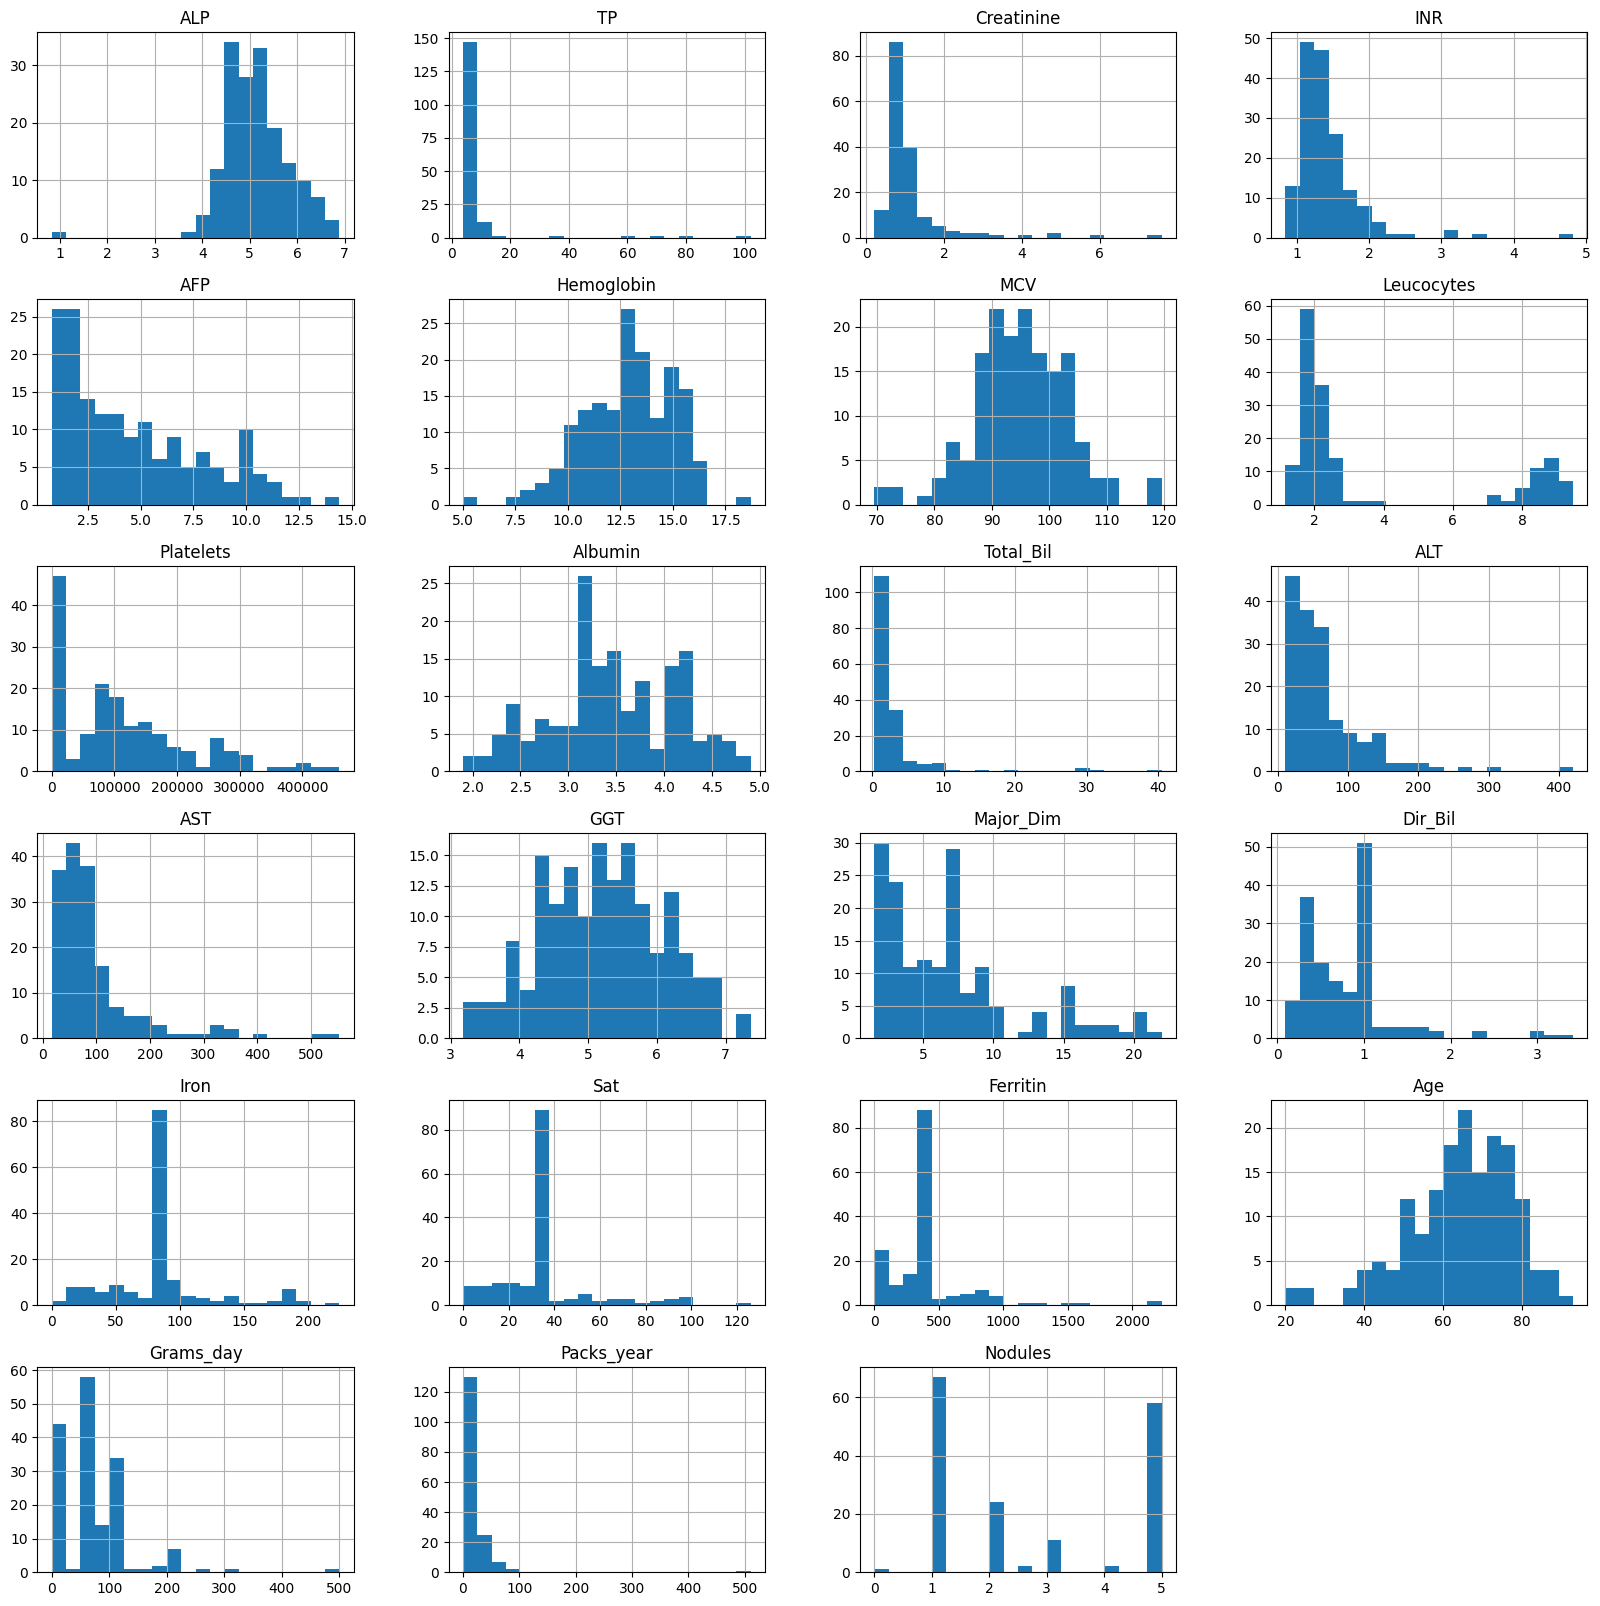

In [196]:
# Filtrar o dataframe para incluir apenas as colunas numéricas que existem
colunas_existentes = [col for col in colunas_numericas if col in data.columns]

# Plotar histogramas
data[colunas_existentes].hist(figsize=(20, 20), bins=20, layout=(6, 4))
plt.show()

Com a tabela das estatísticas descritivas e com estes histogrmas conseguimos verificar que os dados indicam que a amostra consiste predominantemente de indivíduos idosos, do sexo masculino, com alta prevalência de cirrose e sintomas associados, como varizes e esplenomegalia. Uma proporção significativa de pacientes consume álcool e tabaco em quantidades consideráveis. Cerca de 62% dos indivíduos sobreveivem. 

## 3.9 Verificar a existência de outliers com boxplots

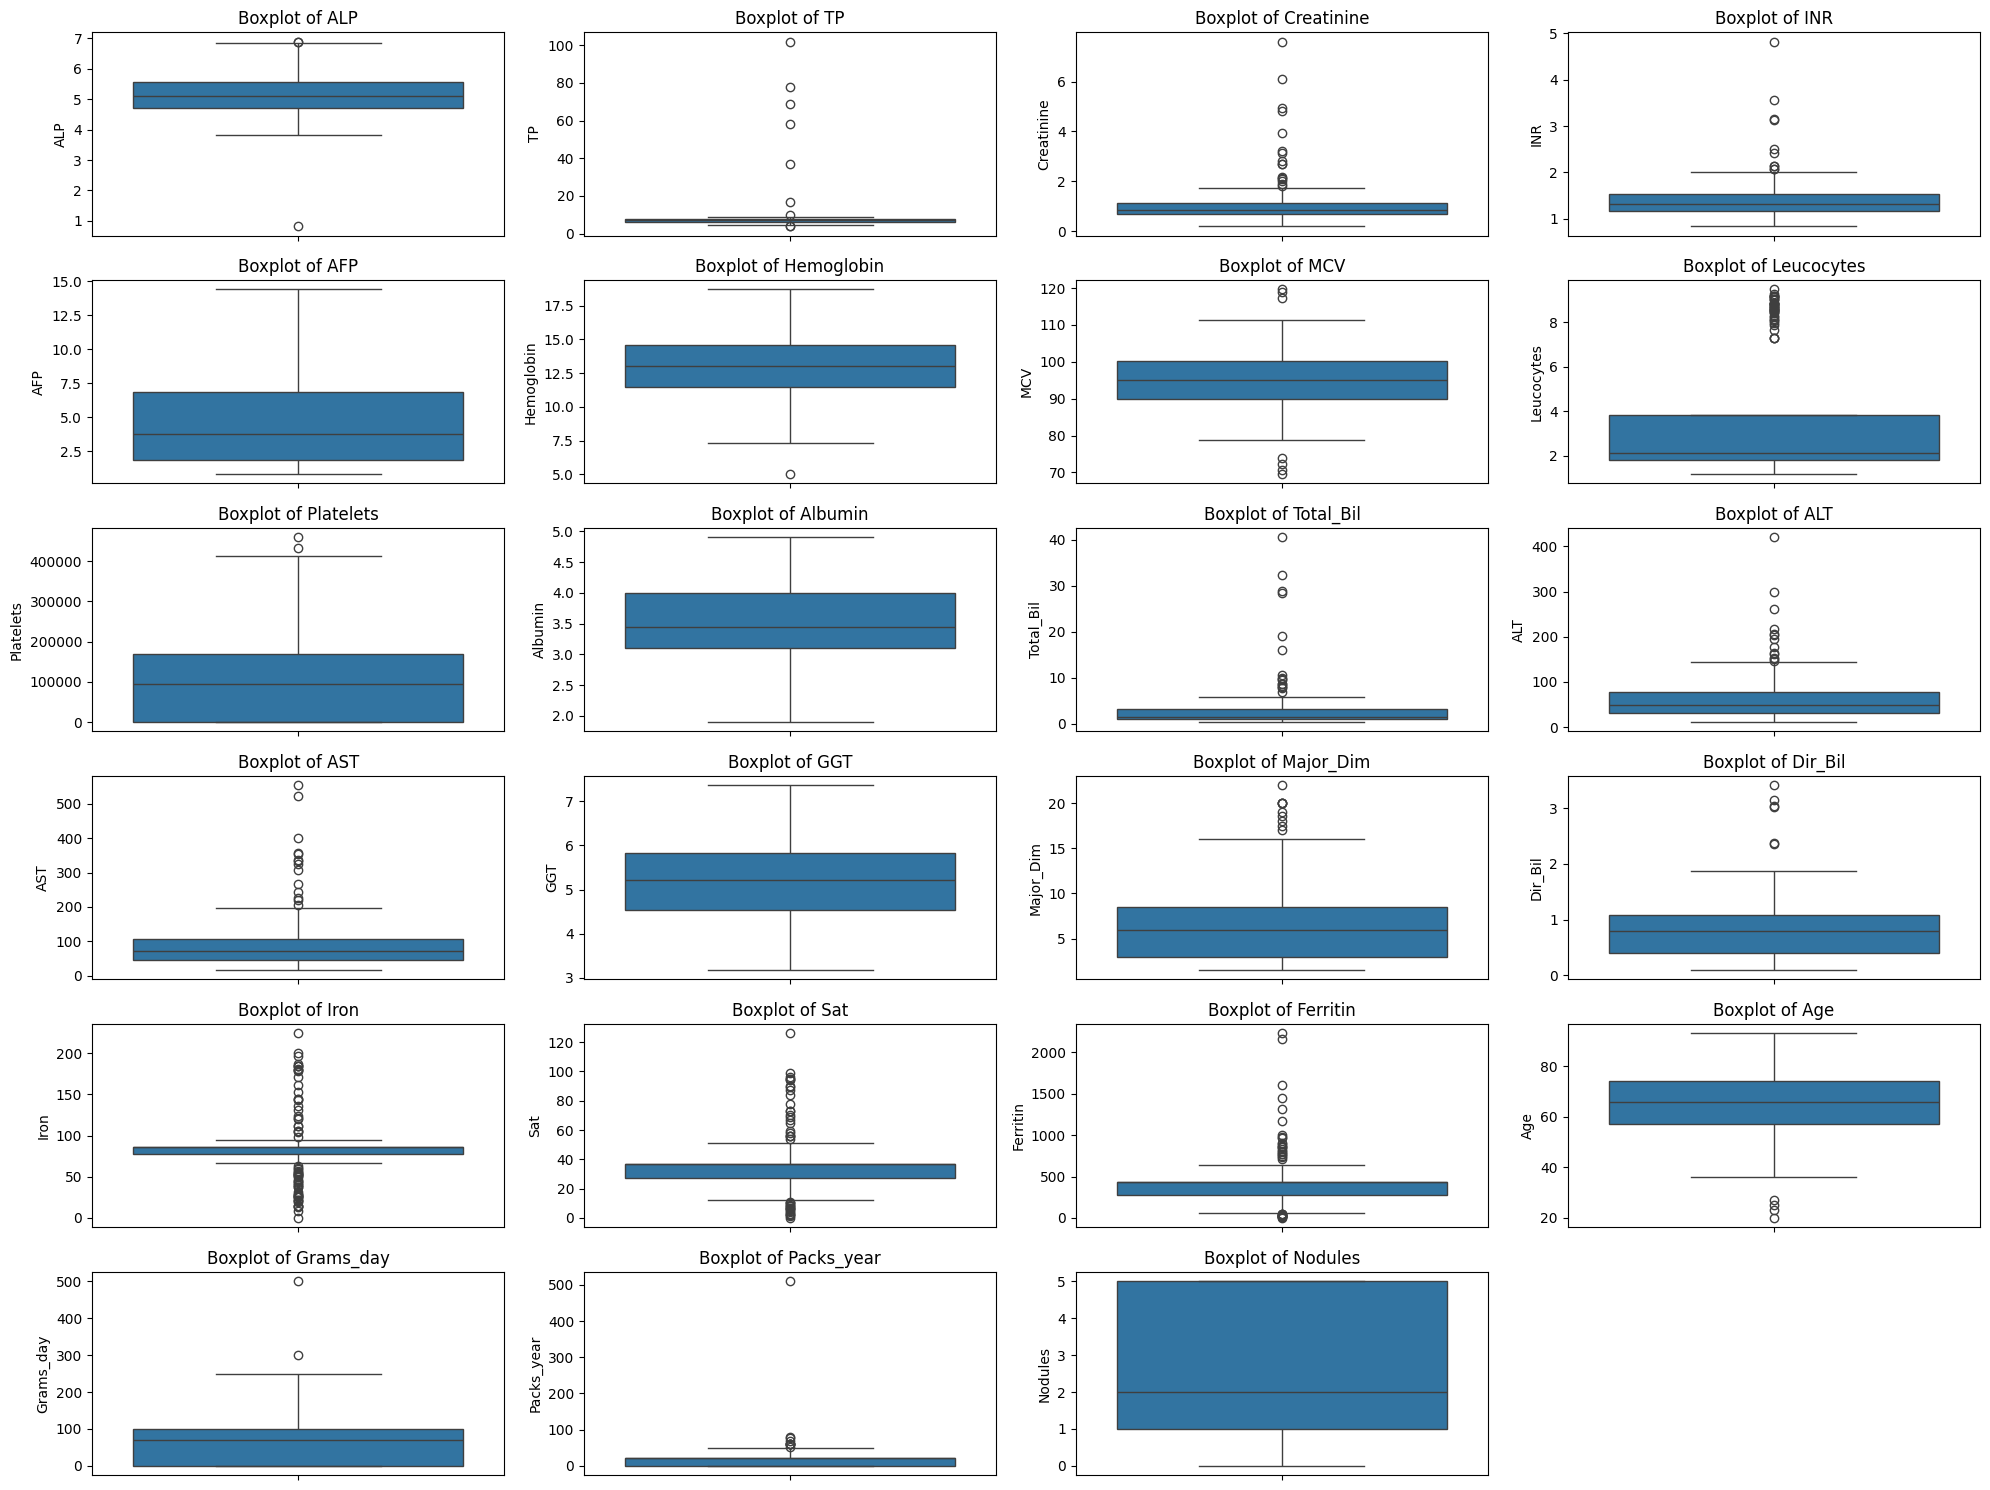

In [197]:
# Verifica a existencia de outliers com boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(colunas_existentes):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Boxplots: 

A caixa central representa o quartil 1 (Q1) e o quartil 3 (Q3), com uma linha divisória no meio que representa a mediana. 
As linhas horizontais  acima e abaixo da caixa representam o alcance interquartílico (IQR), que inclui 50% dos dados. 
Os pontos fora do IQR são considerados outliers.

## Ao analisarmos os dados, conseguimos perceber que existem valores em falta e outliers. 

## DATA PREPROCESSING

## Passo 4: Passar todas as colunas a colunas numéricas

## 4.1 Agrupar as colunas numéricas e as colunas categóricas

In [198]:
data = pd.DataFrame(data)

## 4.2 Criar um gráfico radar

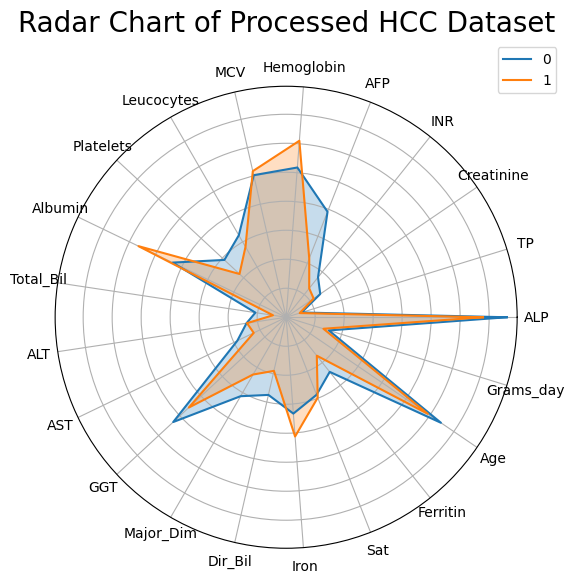

In [199]:
# Função para criar gráfico de radar
def create_radar_chart(data, title, labels):
    num_vars = len(labels)

    # Computar ângulo para cada eixo
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Inicializar gráfico de radar
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for idx, (class_name, row) in enumerate(data.iterrows()):
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=class_name)
        ax.fill(angles, values, alpha=0.25)

    # Desenhar um eixo por variável e adicionar rótulos
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Adicionar título e legenda
    ax.set_title(title, size=20, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Remover espaços extras dos nomes das colunas
data.columns = [col.strip() if isinstance(col, str) else col for col in data.columns]

# Verificar se a coluna 'Class' está presente
if 'Class' not in data.columns:
    raise KeyError("'Class' column is not found in the dataset.")

# Identificar colunas numéricas conforme especificado no notebook
colunas_numericas = [
    'ALP', 'TP', 'Creatinine', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 
    'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin', 
    'Age', 'Grams_day'
]

# Filtrar colunas numéricas que estão presentes no dataset
colunas_numericas = [col for col in colunas_numericas if col in data.columns]

# Substituir '?' por NaN e converter colunas para tipos numéricos
data.replace('?', np.nan, inplace=True)
for col in colunas_numericas:
    if data[col].dtype == 'object':  # Verificar se a coluna é do tipo string
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Tratar valores ausentes substituindo pela média de cada coluna
for col in colunas_numericas:
    media = data[col].mean()
    data[col].fillna(media, inplace=True)

# Normalizar os dados
data_normalized = (data[colunas_numericas] - data[colunas_numericas].min()) / (data[colunas_numericas].max() - data[colunas_numericas].min())

# Adicionar a coluna 'Class' para rotulagem
data_normalized['Class'] = data['Class']

# Calcular a média para cada classe
data_grouped = data_normalized.groupby('Class').mean()

# Criar gráfico de radar com os dados agrupados
create_radar_chart(data_grouped, 'Radar Chart of Processed HCC Dataset', colunas_numericas)

Análise do Gráfico de Radar:

Variáveis no Gráfico de Radar:

O gráfico de radar inclui variáveis numéricas. 

O gráfico compara duas classes, rotuladas como 0 e 1, que 'Vive' e 'Morre' na coluna 'Class'.

Diferenças Principais:
ALP : A Classe 1 (presumivelmente 'Morre') parece ter níveis médios mais altos em comparação com a Classe 0 (presumivelmente 'Vive').
AFP : A Classe 1 mostra níveis elevados em relação à Classe 0, sugerindo que pode ser um marcador significativo.
INR : A Classe 1 tende a ter valores de INR ligeiramente mais altos, indicando potenciais problemas de coagulação.
Hemoglobina: A Classe 0 parece ter níveis ligeiramente mais altos de Hemoglobina em comparação com a Classe 1.
Imputação e Normalização de Dados:

Os valores em falta foram substituídos pela média de cada coluna.
Os dados foram normalizados para escalar as variáveis entre 0 e 1, permitindo uma comparação justa entre diferentes escalas.

## 4.4 Substituição de "?" nas colunas numéricas pela média de cada coluna e o mesmo para as colunas categóricas, mas pela média.

In [200]:
# Substituir '?' por NaN
data.replace('?', pd.NA, inplace=True)

# Converter colunas numéricas para o tipo adequado e tratar valores ausentes
for col in colunas_numericas:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        media = data[col].mean()
        data[col].fillna(media, inplace=True)

# Tratar valores ausentes nas colunas categóricas
for col in colunas_categoricas:
    if col in data.columns:
        moda = data[col].mode()[0]
        data[col].fillna(moda, inplace=True)

# Converter colunas categóricas usando LabelEncoder
label_encoders = {}
for col in colunas_categoricas:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le

A distribuição das classes na amostra é a seguinte:

Classe 1: 102 indivíduos (61,8%)

Classe 0: 63 indivíduos (38,2%)

## 4.5 Remover os outliers

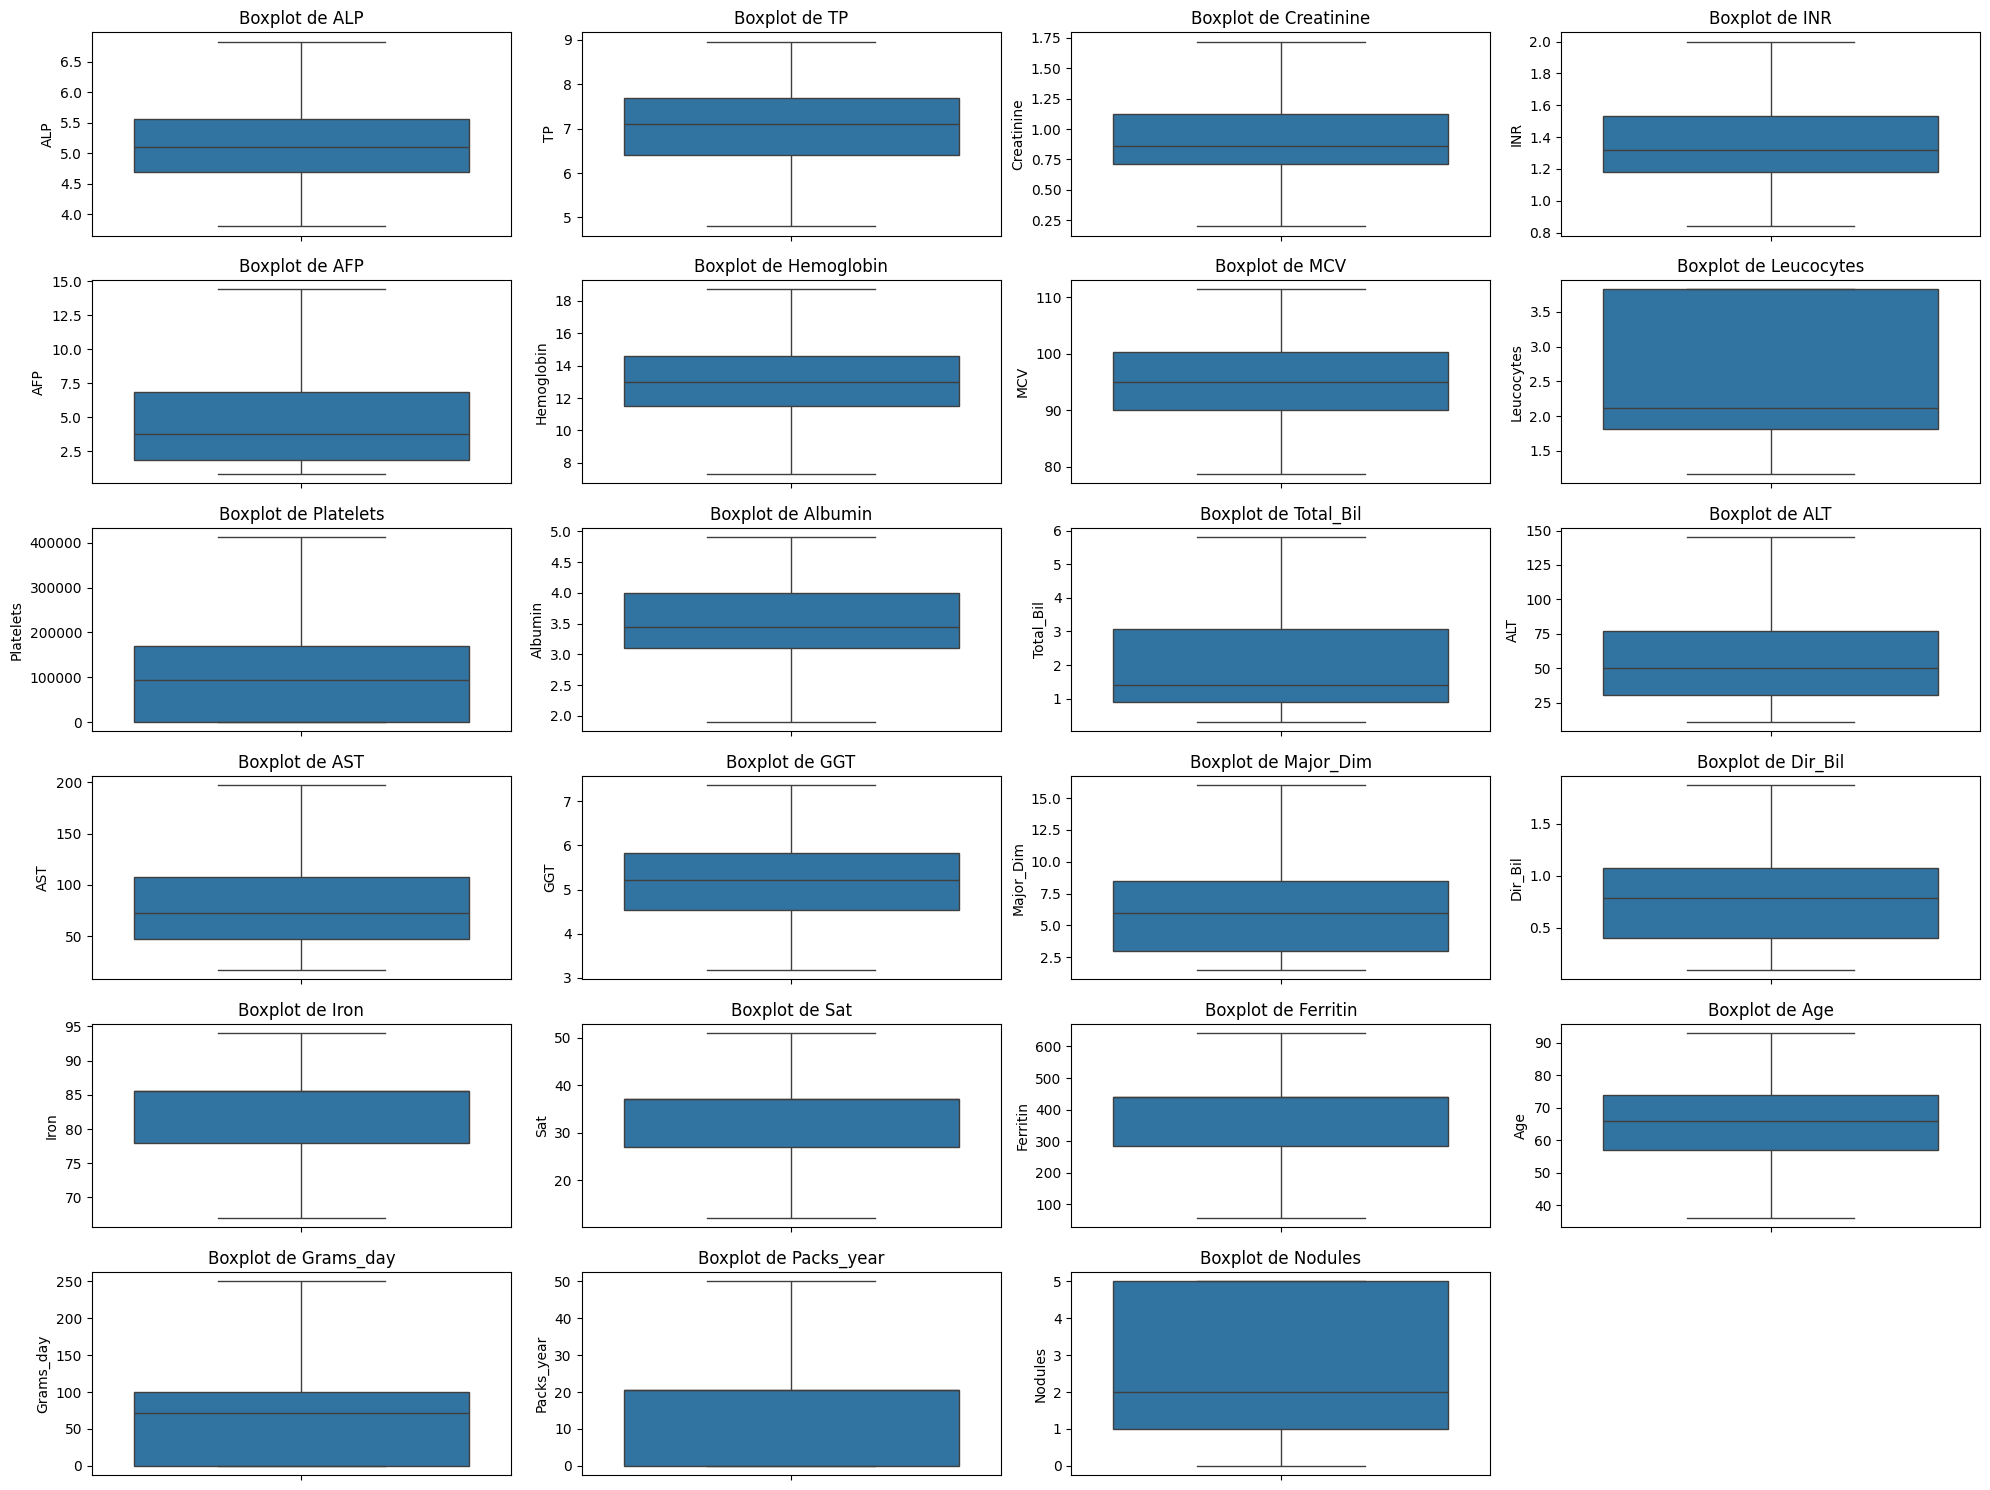

In [201]:
# Verificar outliers com boxplots (sem outliers)
plt.figure(figsize=(20, 15))
for i, col in enumerate(colunas_existentes):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data[col], showfliers=False) 
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

## 4. 6 Verificar a distribuição das classes

In [202]:
class_distribution = data['Class'].value_counts()
print("Distribuição das classes:")
print(class_distribution)

Distribuição das classes:
Class
1    102
0     63
Name: count, dtype: int64


Gráfico para visualizar a distribuicao das classes 

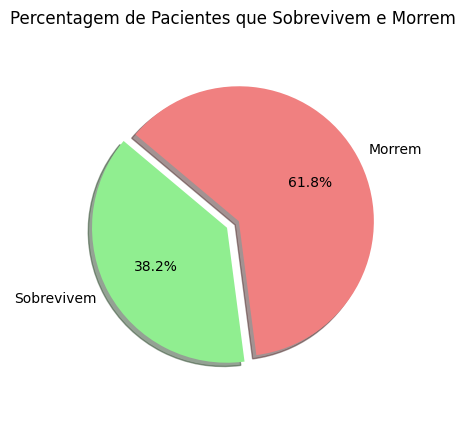

In [203]:
# Contagem de pacientes que sobrevivem e morrem
sobrevivem_count = data[data['Class'] == 0].shape[0]
morrem_count = data[data['Class'] == 1].shape[0]

# Calcular as percentagens
percentagem_sobrevivem = (sobrevivem_count / len(data)) * 100
percentagem_morrem = (morrem_count / len(data)) * 100

# Rótulos e valores
labels = ['Sobrevivem', 'Morrem']
sizes = [percentagem_sobrevivem, percentagem_morrem]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode a primeira fatia

# Criando o gráfico
plt.figure(figsize=(4, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Aspect ratio igual para garantir que o círculo seja desenhado como um círculo

# Adicionando título
plt.title('Percentagem de Pacientes que Sobrevivem e Morrem')

# Mostrando o gráfico
plt.show()

A distribuição das classes na amostra é a seguinte:

Classe 1: 102 indivíduos (61,8%)

Classe 0: 63 indivíduos (38,2%)

In [204]:
# Encontrar a idade da pessoa mais velha
idade_mais_velha = data['Age'].max()

# Encontrar a idade da pessoa mais nova
idade_mais_nova = data['Age'].min()

# Calcular a média das idades
media_idades = data['Age'].mean()

# Verificar os valores únicos na coluna 'Gender'


# Contar o número de mulheres e homens
# Assumindo que após o LabelEncoder, 0 = Female e 1 = Male, como geralmente é o caso
num_mulheres = data['Gender'].value_counts().get(0, 0)
num_homens = data['Gender'].value_counts().get(1, 0)

# Exibir as idades da pessoa mais velha, média das idades, a pessoa mais nova e a contagem de gênero
print("Idade da pessoa mais velha:", idade_mais_velha)
print("Média das idades: {} anos.".format(media_idades))
print("Idade da pessoa mais nova:", idade_mais_nova)
print("Número de mulheres:", num_mulheres)
print("Número de homens:", num_homens)

Idade da pessoa mais velha: 93
Média das idades: 64.69090909090909 anos.
Idade da pessoa mais nova: 20
Número de mulheres: 32
Número de homens: 133


## 4.7. Distribuição das idades dentro dos intervalos definidos

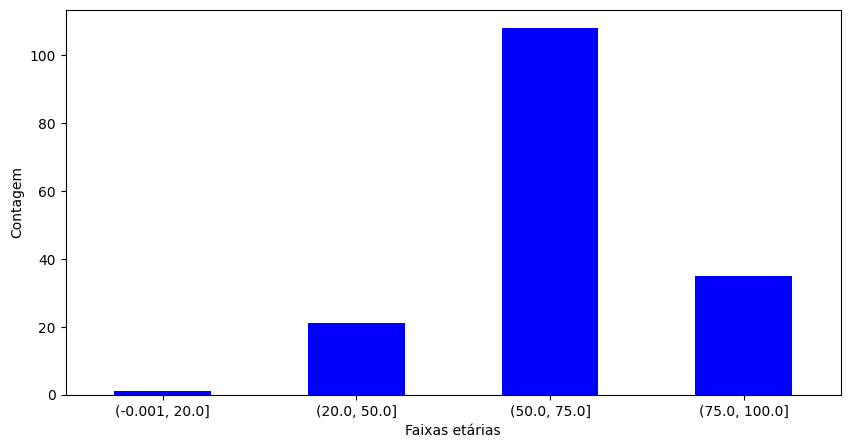

In [205]:
# Definir os intervalos (bins) para as idades
bins = [0, 20, 50, 75, 100]

# Categorizar os dados da coluna 'Age' em intervalos definidos
out = pd.cut(
    data.Age,  # Dados da coluna 'Age'
    bins=bins,  # Intervalos definidos
    include_lowest=True  # Incluir o valor mais baixo no primeiro intervalo
)

# Plotar um gráfico de barras para a contagem dos dados em cada intervalo de idade
ax = out.value_counts(sort=False).plot.bar(
    rot=0,  # Rotacionar os rótulos do eixo x (0 significa sem rotação)
    color="b",  # Definir a cor das barras como azul
    figsize=(10, 5)  # Definir o tamanho da figura
)

# Definir o rótulo do eixo x
plt.xlabel('Faixas etárias')

# Definir o rótulo do eixo y
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()


O eixo x representa os intervalos de idade.
O eixo y mostra a contagem de pessoas em cada intervalo.
A maior barra representa o intervalo de 50 a 75 anos, indicando que a maioria das pessoas do conjunto de dados está nessa faixa etária.

## Passo Extra 1: gráficos de análise creativa dos dados

## 4. 8 Análise da percentagem de homens que morrem e sobrevivem e para as mulheres também. 

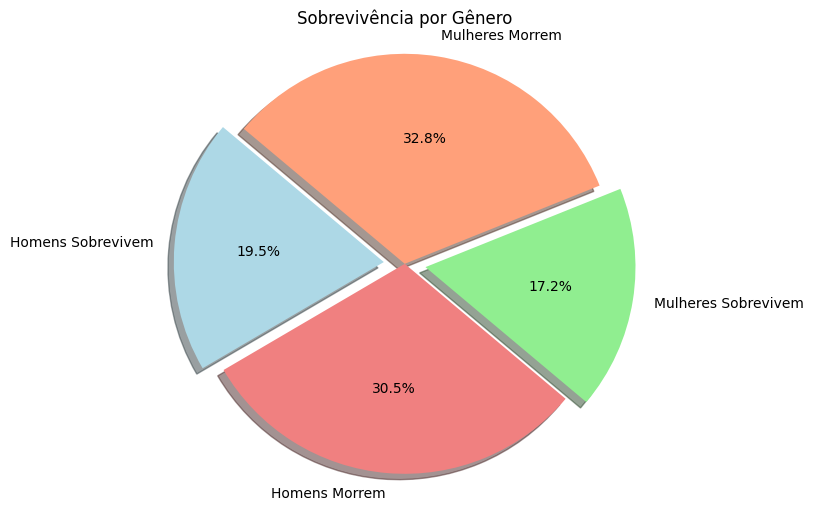

In [206]:
# Contagem de homens e mulheres
total_homens = data[data['Gender'] == 1].shape[0]
total_mulheres = data[data['Gender'] == 0].shape[0]

# Contagem de sobreviventes e não sobreviventes por gênero
homens_sobrevivem = data[(data['Gender'] == 1) & (data['Class'] == 0)].shape[0]
mulheres_sobrevivem = data[(data['Gender'] == 0) & (data['Class'] == 0)].shape[0]
homens_morrem = data[(data['Gender'] == 1) & (data['Class'] == 1)].shape[0]
mulheres_morrem = data[(data['Gender'] == 0) & (data['Class'] == 1)].shape[0]

# Calcular as porcentagens
porcentagem_homens_sobrevivem = (homens_sobrevivem / total_homens) * 100
porcentagem_mulheres_sobrevivem = (mulheres_sobrevivem / total_mulheres) * 100
porcentagem_homens_morrem = (homens_morrem / total_homens) * 100
porcentagem_mulheres_morrem = (mulheres_morrem / total_mulheres) * 100

# Rótulos e valores
labels = ['Homens Sobrevivem', 'Homens Morrem', 'Mulheres Sobrevivem', 'Mulheres Morrem']
sizes = [porcentagem_homens_sobrevivem, porcentagem_homens_morrem, porcentagem_mulheres_sobrevivem, porcentagem_mulheres_morrem]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']
explode = (0.1, 0, 0.1, 0)  # explode 1st slice and 3rd slice

# Criando o gráfico
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adicionando título
plt.title('Sobrevivência por Gênero')

# Mostrando o gráfico
plt.show()

## 4.9 Gráfico que relaciona Age com Class

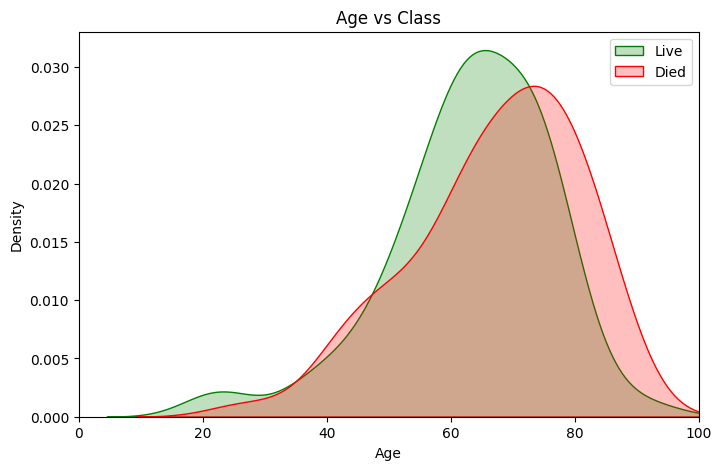

In [207]:
# Configurar o tamanho da figura
plt.figure(figsize=(8, 5))

# Plotar a densidade de kernel (KDE) para a coluna 'Age' onde a classe é 1 (sobrevivente)
sns.kdeplot(
    data.Age[data.Class == 1], 
    color="green",  # Cor verde para a classe 1
    fill=True  # Preencher a área sob a curva
)

# Plotar a densidade de kernel (KDE) para a coluna 'Age' onde a classe é 0 (não sobrevivente)
sns.kdeplot(
    data.Age[data.Class == 0], 
    color="red",  # Cor vermelha para a classe 0
    fill=True  # Preencher a área sob a curva
)

# Adicionar uma legenda ao gráfico
plt.legend(['Live', 'Died'])

# Definir o título do gráfico
plt.title('Age vs Class')

# Definir os limites do eixo x
plt.xlim(0, 100)

# Exibir o gráfico
plt.show()



Interpretação:

As áreas onde as duas curvas se sobrepõem indicam idades onde tanto sobreviventes quanto falecidos estão presentes.
As áreas onde uma curva está mais alta que a outra indicam idades onde há uma maior concentração de indivíduos daquela classe específica.


## 4.10 Gráfico que subdivide o anterior em Female e Male

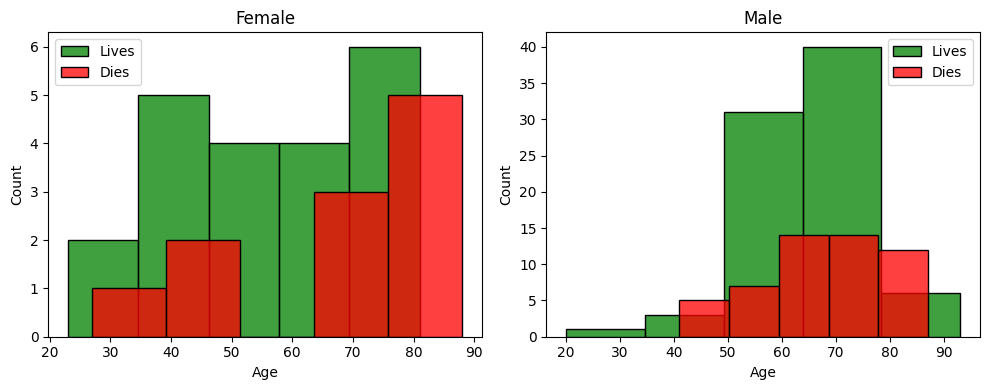

In [208]:
# Definir rótulos para as classes
Lives = 'Lives'
Dies = 'Dies'

# Criar uma figura com dois subplots (lado a lado)
fig, axes = plt.subplots(
    nrows=1,  # Número de linhas de subplots
    ncols=2,  # Número de colunas de subplots
    figsize=(10, 4)  # Tamanho da figura
)

# Filtrar os dados para mulheres (0 para mulheres)
Female = data[data['Gender'] == 0]

# Filtrar os dados para homens (1 para homens)
Male = data[data['Gender'] == 1]

# Plotar histograma para a idade das mulheres que sobreviveram
ax = sns.histplot(
    Female[Female['Class'] == 1].Age.dropna(),  # Dados de idade das mulheres que sobreviveram
    bins=5,  # Número de bins para o histograma
    label=Lives,  # Rótulo para a legenda
    ax=axes[0],  # Eixo onde o gráfico será plotado
    kde=False,  # Não plotar a densidade de kernel
    color='green'  # Cor verde para as barras
)

# Plotar histograma para a idade das mulheres que não sobreviveram
ax = sns.histplot(
    Female[Female['Class'] == 0].Age.dropna(),  # Dados de idade das mulheres que não sobreviveram
    bins=5,  # Número de bins para o histograma
    label=Dies,  # Rótulo para a legenda
    ax=axes[0],  # Eixo onde o gráfico será plotado
    kde=False,  # Não plotar a densidade de kernel
    color='red'  # Cor vermelha para as barras
)

# Adicionar legenda ao gráfico das mulheres
ax.legend()

# Definir o título do gráfico das mulheres
ax.set_title('Female')

# Plotar histograma para a idade dos homens que sobreviveram
ax = sns.histplot(
    Male[Male['Class'] == 1].Age.dropna(),  # Dados de idade dos homens que sobreviveram
    bins=5,  # Número de bins para o histograma
    label=Lives,  # Rótulo para a legenda
    ax=axes[1],  # Eixo onde o gráfico será plotado
    kde=False,  # Não plotar a densidade de kernel
    color='green'  # Cor verde para as barras
)

# Plotar histograma para a idade dos homens que não sobreviveram
ax = sns.histplot(
    Male[Male['Class'] == 0].Age.dropna(),  # Dados de idade dos homens que não sobreviveram
    bins=5,  # Número de bins para o histograma
    label=Dies,  # Rótulo para a legenda
    ax=axes[1],  # Eixo onde o gráfico será plotado
    kde=False,  # Não plotar a densidade de kernel
    color='red'  # Cor vermelha para as barras
)

# Adicionar legenda ao gráfico dos homens
ax.legend()

# Definir o título do gráfico dos homens
_ = ax.set_title('Male')

# Ajustar o layout para que os subplots não se sobreponham
plt.tight_layout()

# Exibir o gráfico
plt.show()


A análise dos gráficos revela que:

Para mulheres: A sobrevivência parece ser mais distribuída entre diferentes faixas etárias, enquanto os falecimentos são mais concentrados em idades avançadas (70-80 anos).

Para homens: Existe uma maior concentração de sobreviventes e falecidos nas faixas etárias de 60-70 e 70-80 anos, com um número relativamente menor de falecidos em idades mais jovens.


## 4.11 Matriz Correlação de Todas as Variáveis 

In [209]:
plt.figure(figsize=(35, 25)) # Definindo o tamanho da figura
matriz_correlacao = data.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
# Ajustar o tamanho da fonte dos rótulos nos eixos x e y
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Ajustar o tamanho da fonte do título
plt.title('Matriz de Correlação de Todas as Variáveis', fontsize=25)
plt.show()

A matriz de correlação é uma tabela que mostra os coeficientes de correlação entre diferentes variáveis em um conjunto de dados. Os coeficientes de correlação são valores que variam entre -1 e 1 e indicam a força e a direção da relação linear entre as variáveis.

Valor 1: Correlação perfeita positiva.
Valor -1: Correlação perfeita negativa.
Valor 0: Nenhuma correlação linear.

1. Identificação de Correlações Fortes:

1.1. Correlação Positiva:

Células com cores próximas do vermelho indicam uma forte correlação positiva.
Exemplo: A correlação entre AST e ALT é alta (0.92), indicando que, conforme um aumenta, o outro tende a aumentar também.

1.2. Correlação Negativa:

Células com cores próximas do azul indicam uma forte correlação negativa.
Exemplo: A correlação entre Albumin e Total_Bil é negativa (-0.37), indicando que, conforme um aumenta, o outro tende a diminuir.


2. Interpretação das Variáveis:

2.1 Class (a variável alvo):

Podemos observar como Class se correlaciona com outras variáveis.
Exemplo: Age tem uma correlação positiva moderada com Class (0.28), sugerindo que a idade pode influenciar a classe (sobrevivência/morte).


2.2 Outras Variáveis :

Variáveis como AST, ALT, Albumin, Total_Bil são indicadores médicos frequentemente correlacionados.
Exemplo: AST e GGT têm uma correlação positiva alta (0.67), sugerindo que esses dois indicadores podem estar relacionados a condições hepáticas.

3. Conclusão

3.1. Agrupamento de Variáveis Médicas:

Variáveis como AST, ALT, GGT, Total_Bil, Albumin tendem a mostrar correlações significativas entre si, indicando que podem estar relacionadas a funções ou condições hepáticas.

3.2 Idade e Classe:

A correlação positiva moderada entre Age e Class sugere que a idade pode ter um impacto na sobrevivência ou no falecimento.

## 4.12 Correlação de cada variável com Class

/var/folders/fx/92b2vtzs0d30lkd7wvr1fb_80000gn/T/ipykernel_15076/1742044035.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




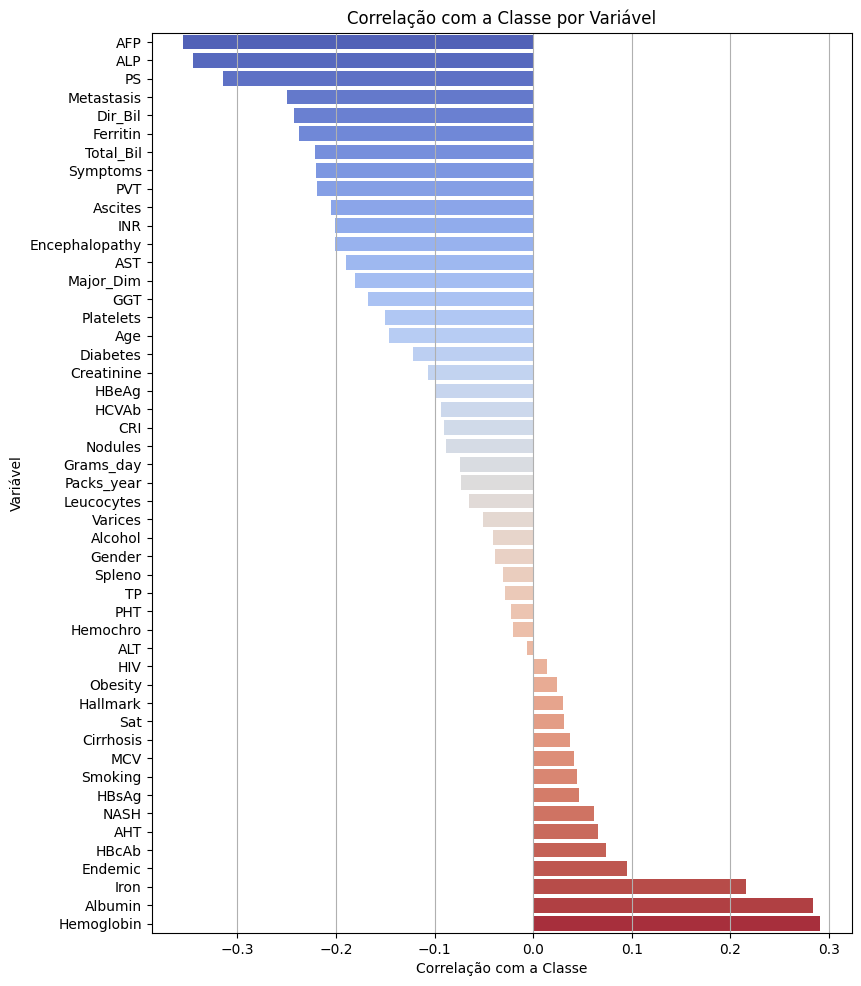

Index(['Symptoms', 'Diabetes', 'PVT', 'Metastasis', 'Age', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'Platelets',
       'Albumin', 'Total_Bil', 'AST', 'GGT', 'ALP', 'Creatinine', 'Major_Dim',
       'Dir_Bil', 'Iron', 'Ferritin', 'Class'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a correlação de Pearson entre as variáveis e a classe
correlation_with_class = data.corr()['Class'].sort_values()

# Excluir a própria variável 'Class' da lista de correlações
correlation_with_class = correlation_with_class.drop('Class')

# Criar o gráfico de barras dos valores de correlação ordenados crescentemente
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_class.values, y=correlation_with_class.index, color='b', palette='coolwarm')
plt.xlabel('Correlação com a Classe')
plt.ylabel('Variável')
plt.title('Correlação com a Classe por Variável')
plt.grid(axis='x')

# Ajustar o espaço entre as labels no eixo y
plt.subplots_adjust(left=0.25, right=0.95, top=1.5, bottom=0.0)

plt.show()

# Matriz de correlação
corr_matrix = data.corr()

# Selecionar as variáveis que têm uma correlação significativa com a variável alvo 'Class'
corr_target = abs(corr_matrix["Class"])
relevant_features = corr_target[corr_target > 0.1].index

# Exibir as variáveis mais relevantes
relevant_features




Interpretação do Gráfico

O gráfico gerado mostra a correlação de Pearson entre várias variáveis e a variável alvo `Class` . 

Os valores de correlação variam de -1 a 1, onde:

1 indica uma correlação positiva perfeita.
-1 indica uma correlação negativa perfeita.
0 indica nenhuma correlação.


No gráfico:
- As barras vermelhas indicam correlações positivas.
- As barras azuis indicam correlações negativas.
- As variáveis estão ordenadas com base nos valores de correlação.

Análise das Variáveis : Vamos examinar as variáveis com as correlações mais significativas, tanto positivas quanto negativas.

1. Variáveis com Correlação Positiva

- Hemoglobin: A correlação mais alta com `Class` (~0.3), indicando que níveis mais altos de hemoglobina estão associados à classe `Class`.
- Albumin: Também tem uma correlação positiva (~0.3), sugerindo que níveis mais altos de albumina estão associados à classe `Class`.
- Iron, Endemic: Ambas as variáveis têm correlações positivas significativas, indicando que altos valores dessas variáveis estão associados à classe `Class`.

2. Variáveis com Correlação Negativa

- AFP: Tem a correlação negativa mais forte (~-0.3), sugerindo que níveis mais altos de AFP estão associados a uma menor probabilidade de pertencer à classe `Class`.
- ALP, PS: Ambas têm correlações negativas (~-0.3 e ~-0.25 respectivamente), indicando que altos valores dessas variáveis estão associados a uma menor probabilidade de pertencer à classe `Class`.

3. Variáveis com Correlação Próxima de Zero

- Há várias variáveis cujas correlações com `Class` estão próximas de zero, indicando pouca ou nenhuma relação linear com a variável alvo. Essas variáveis incluem `NASH`, `HBsAg`, `Smoking`, entre outras.



Conclusões

1. Identificação de Variáveis Relevantes:
   - Variáveis como `Hemoglobin`, `Albumin`, `Iron`, `Endemic` são positivamente correlacionadas com a classe `Class`.
   - Variáveis como `AFP`, `ALP`, `PS` têm correlações negativas significativas com a classe `Class`.

2. Uso em Modelagem Preditiva:
   - As variáveis com correlações absolutas mais altas (positivas ou negativas) são as mais relevantes para prever a classe `Class`.
   - As variáveis com correlações próximas de zero são menos informativas e podem ser menos úteis em modelos preditivos

## 4. 13 Matriz Correlação e HeatMap das Variáveis Relevantes

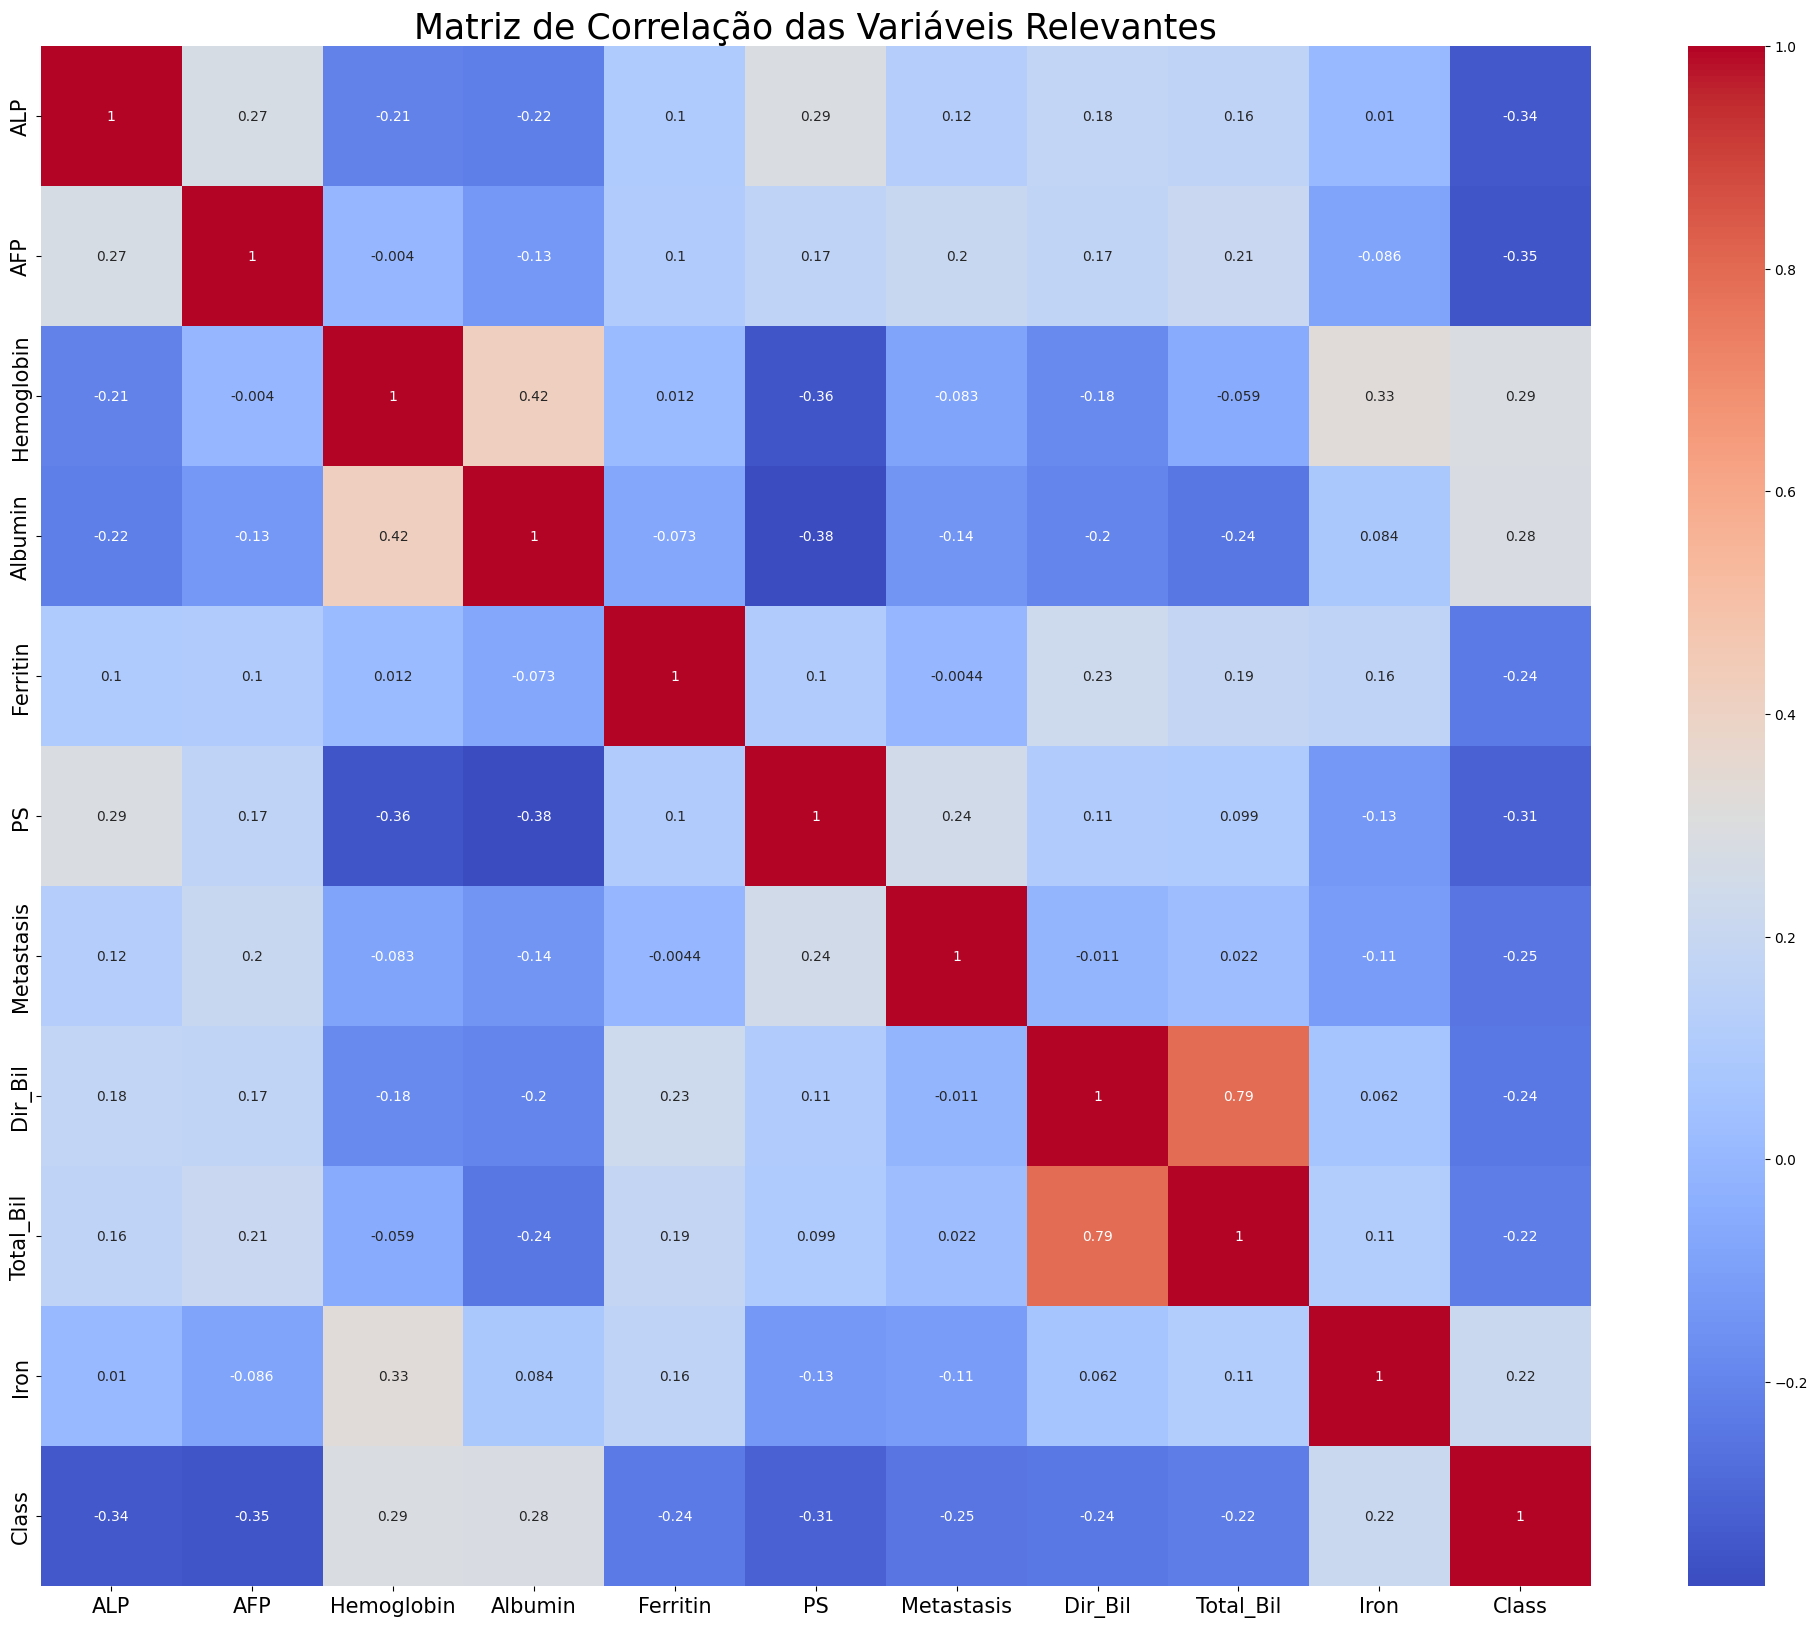

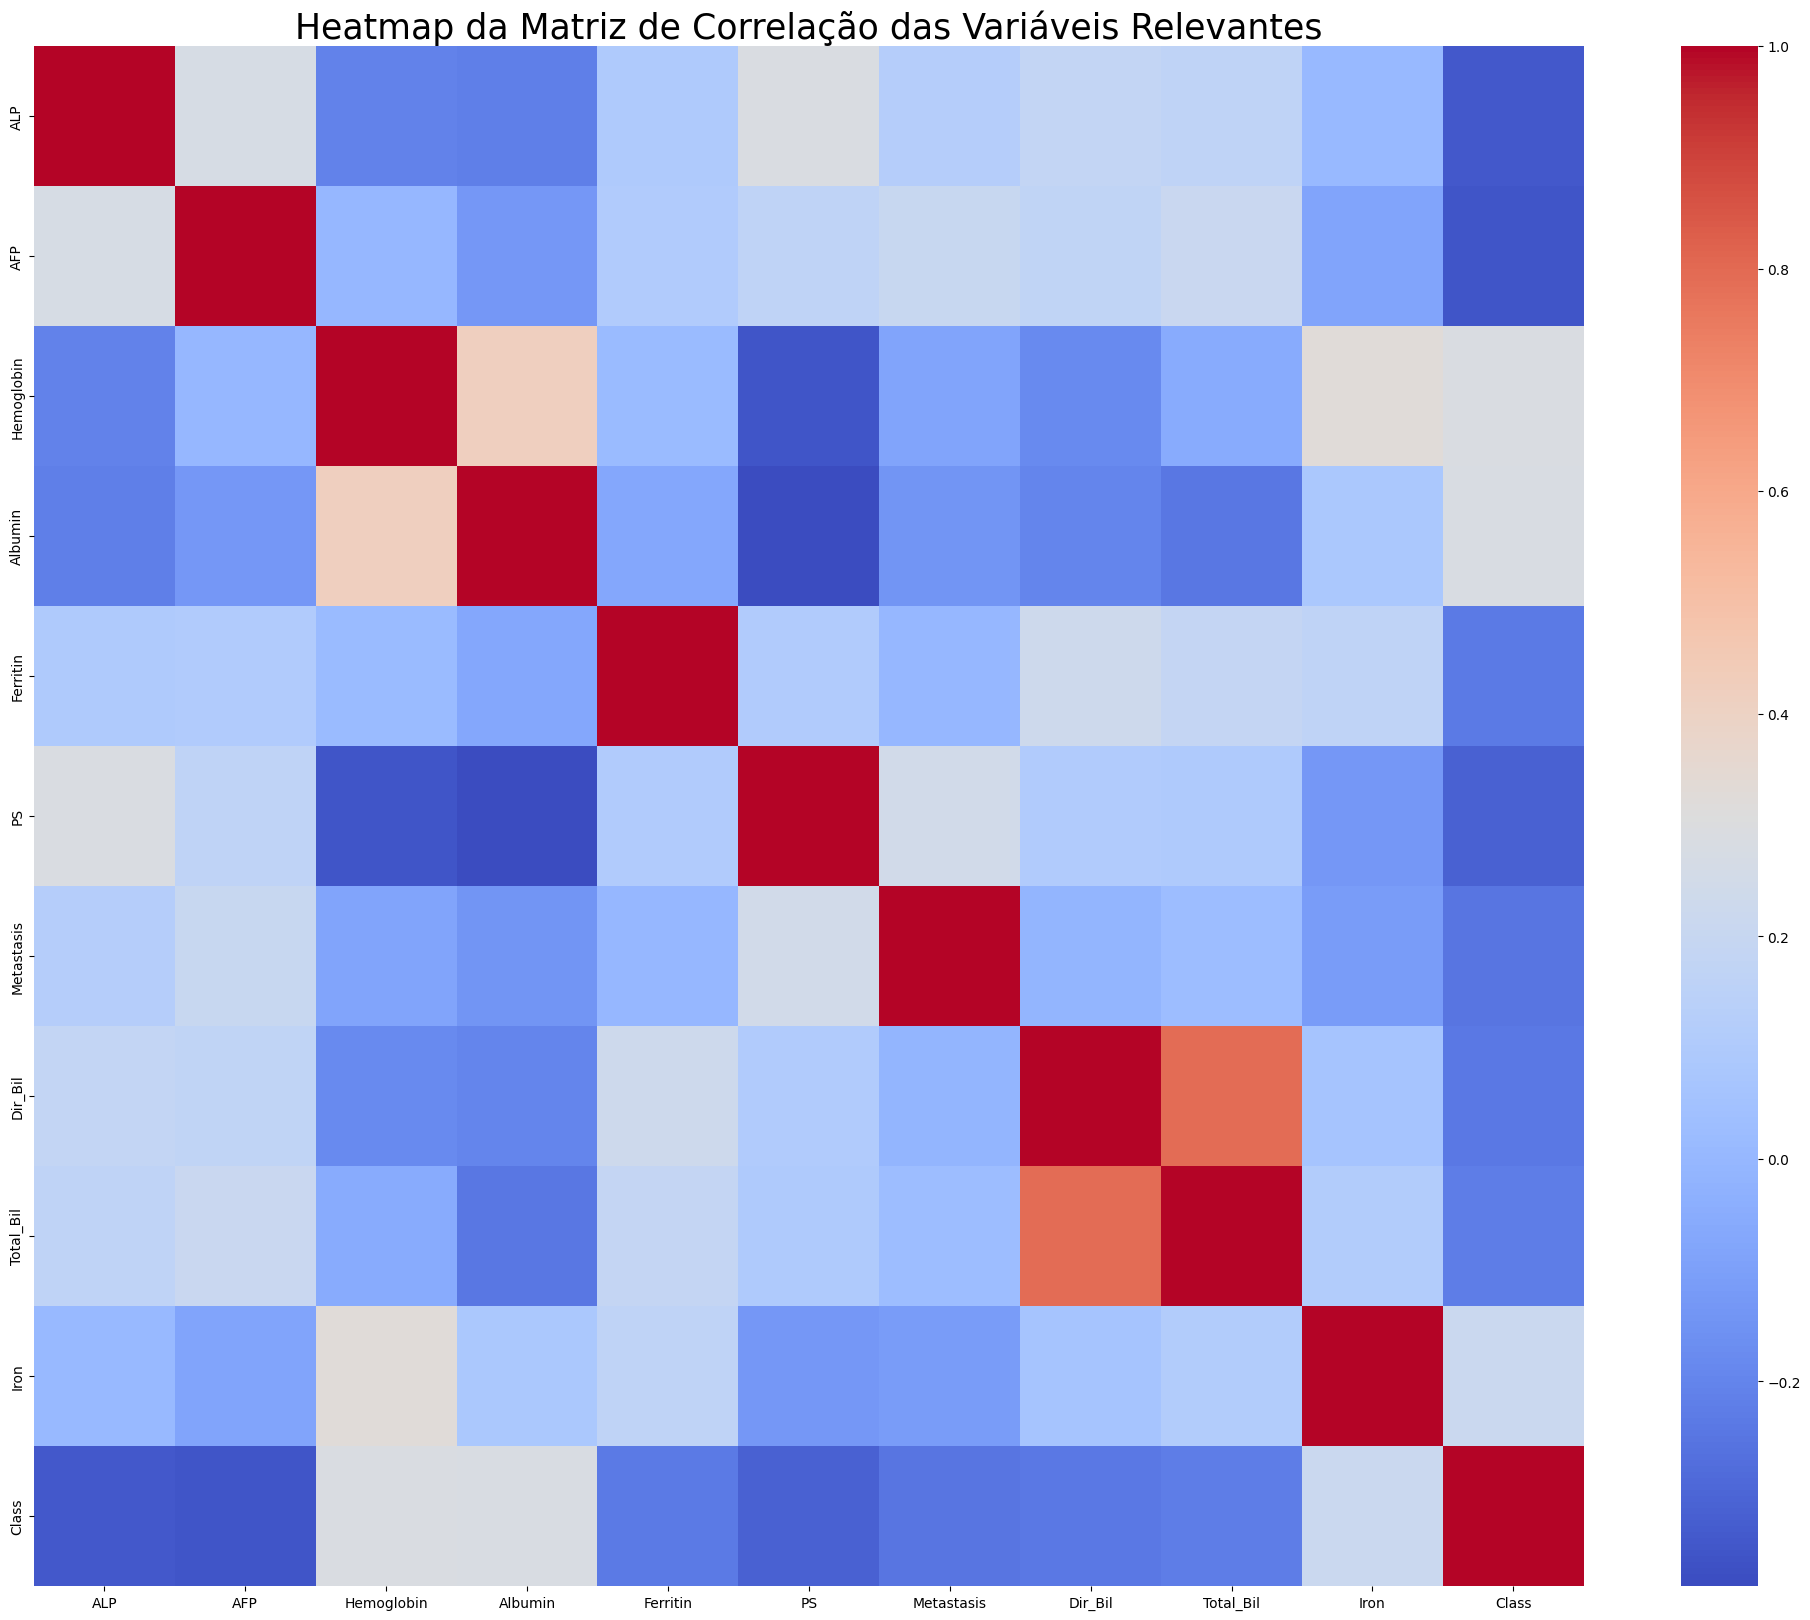

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas as colunas das variáveis relevantes
variaveis_relevantes = ['ALP', 'AFP', 'Hemoglobin', 'Albumin', 'Ferritin', 'PS', 'Metastasis', 'Dir_Bil', 'Total_Bil', 'Iron', 'Class']
matriz_correlacao_relevante = data[variaveis_relevantes].corr()

# Definindo o tamanho da figura
plt.figure(figsize=(25, 20))

# Criando o heatmap
sns.heatmap(matriz_correlacao_relevante, annot=True, cmap='coolwarm')

# Ajustar o tamanho da fonte dos rótulos nos eixos x e y
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Ajustar o tamanho da fonte do título
plt.title('Matriz de Correlação das Variáveis Relevantes', fontsize=25)

# Exibir o heatmap
plt.show()

matriz_correlacao_relevante = data[variaveis_relevantes].corr()

# Definindo o tamanho da figura
plt.figure(figsize=(25, 20))

# Criando o heatmap
sns.heatmap(matriz_correlacao_relevante, cmap='coolwarm', cbar=True)

# Ajustar o tamanho da fonte do título
plt.title('Heatmap da Matriz de Correlação das Variáveis Relevantes', fontsize=25)

# Exibir o heatmap
plt.show()

## DATA MODELING (Supervised Learning) and DATA EVALUATION

## Passo 5 : Validação Cruzada

Variáveis Relevantes: ['Symptoms', 'Diabetes', 'PVT', 'Metastasis', 'Age', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'Platelets', 'Albumin', 'Total_Bil', 'AST', 'GGT', 'ALP', 'Creatinine', 'Major_Dim', 'Dir_Bil', 'Iron', 'Ferritin']
Distribuição das classes após SMOTE: [82 82]
Accuracy Stacking: 0.5151515151515151
Classification Report Stacking:
               precision    recall  f1-score   support

           0       0.40      0.46      0.43        13
           1       0.61      0.55      0.58        20

    accuracy                           0.52        33
   macro avg       0.51      0.51      0.50        33
weighted avg       0.53      0.52      0.52        33

Confusion Matrix Stacking:
 [[ 6  7]
 [ 9 11]]
                Modelo  Acurácia  Precisão  Recall  F1-Score   AUC-ROC
0        Decision Tree  0.666667  0.714286    0.75  0.731707  0.644231
1                  KNN  0.515152  0.625000    0.50  0.555556  0.519231
2        Random Forest  0.727273  0.823529 

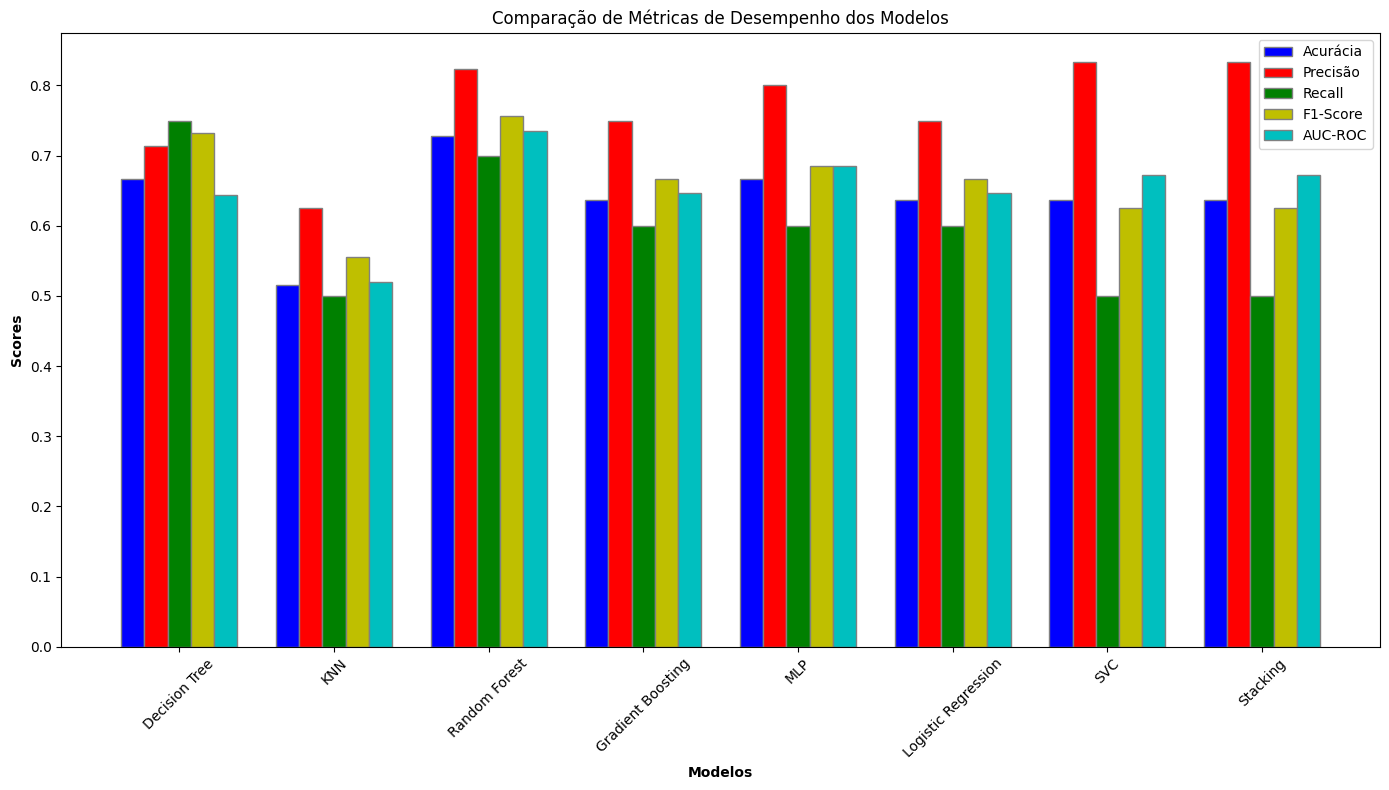

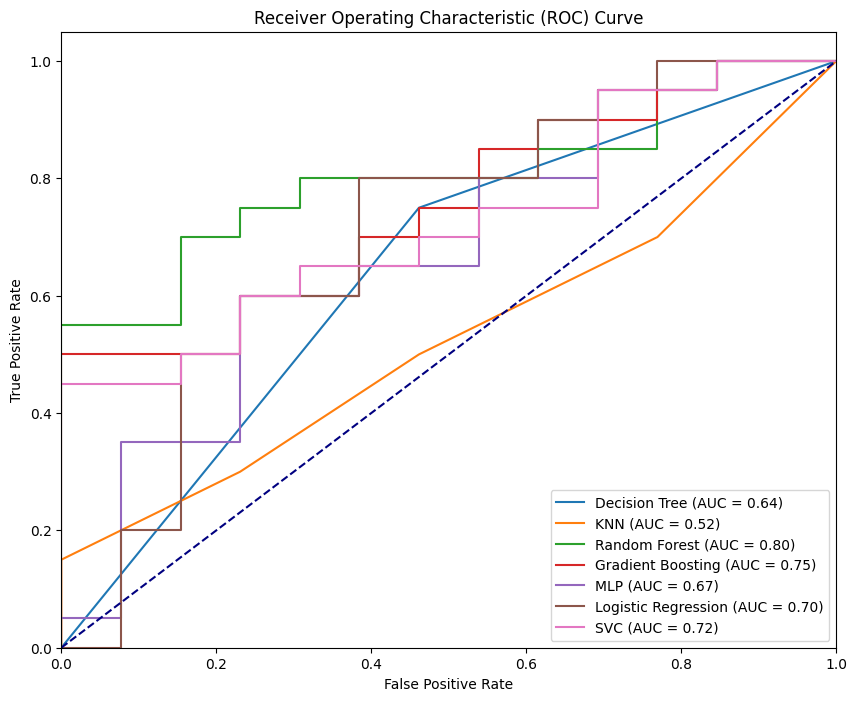

Resultados da Validação Cruzada:
Random Forest: 0.74
Gradient Boosting: 0.70
SVC: 0.60


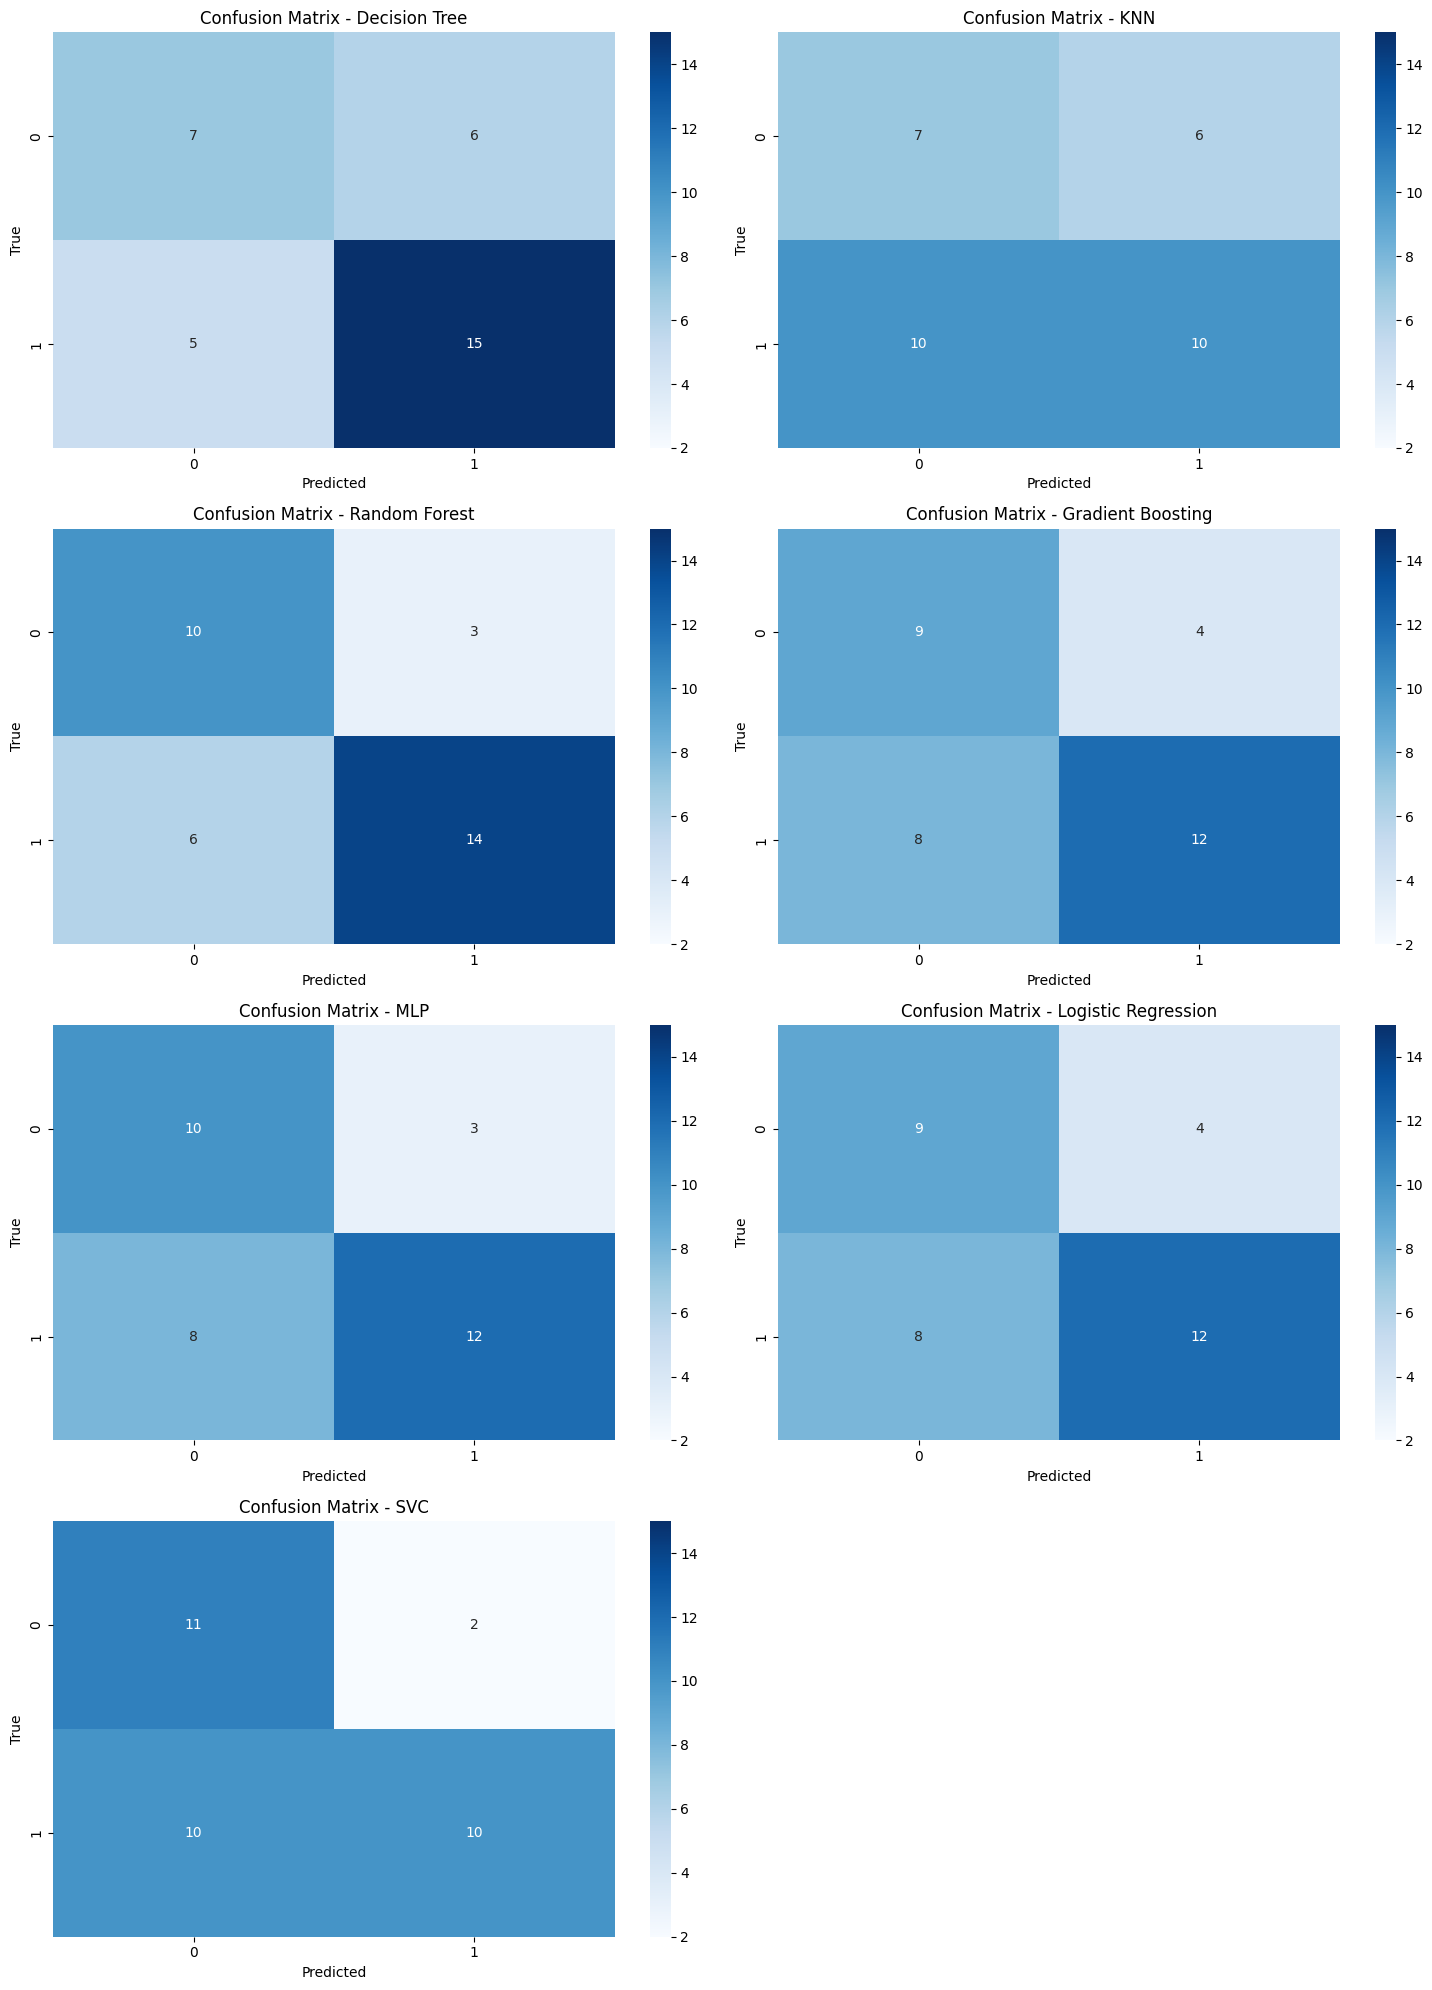

In [ ]:
# Seleção de características com correlação significativa com a variável alvo
corr_matrix = data.corr()
corr_target = corr_matrix['Class'].abs()
relevant_features = corr_target[corr_target > 0.1].index.tolist()

# Verificar se a coluna 'Class' está nas variáveis relevantes e removê-la se necessário
if 'Class' in relevant_features:
    relevant_features.remove('Class')

# Exibir as variáveis mais relevantes
print("Variáveis Relevantes:", relevant_features)

X = data[relevant_features]

# Convertendo a variável alvo para categórica
y = data['Class']
if y.dtype != 'int' and y.dtype != 'category':
    y = LabelEncoder().fit_transform(y)

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar o balanceamento dos dados
print("Distribuição das classes após SMOTE:", np.bincount(y_train_res))

# Escalonando os dados
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Convertendo de volta para DataFrame para manter os nomes das colunas
X_train_res_scaled = pd.DataFrame(X_train_res_scaled, columns=relevant_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=relevant_features)

# Definição dos modelos com ajustes de hiperparâmetros
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "MLP": MLPClassifier(max_iter=1000, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVC": SVC(probability=True, random_state=42)
}

# Treinamento dos modelos
for name, model in models.items():
    model.fit(X_train_res_scaled, y_train_res)

# Implementação do StackingClassifier

# Definir classificadores base
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

# Definir o meta-classificador
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Treinar o modelo
stacking_clf.fit(X_train_res_scaled, y_train_res)

# Fazer previsões
y_pred = stacking_clf.predict(X_test_scaled)

# Avaliação do modelo
print("Accuracy Stacking:", accuracy_score(y_test, y_pred))
print("Classification Report Stacking:\n", classification_report(y_test, y_pred))
print("Confusion Matrix Stacking:\n", confusion_matrix(y_test, y_pred))

# Avaliando os modelos
evaluation_metrics = {
    "Modelo": [],
    "Acurácia": [],
    "Precisão": [],
    "Recall": [],
    "F1-Score": [],
    "AUC-ROC": []
}

predictions = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    evaluation_metrics["Modelo"].append(name)
    evaluation_metrics["Acurácia"].append(accuracy_score(y_test, y_pred))
    evaluation_metrics["Precisão"].append(precision_score(y_test, y_pred))
    evaluation_metrics["Recall"].append(recall_score(y_test, y_pred))
    evaluation_metrics["F1-Score"].append(f1_score(y_test, y_pred))
    evaluation_metrics["AUC-ROC"].append(roc_auc_score(y_test, y_pred))

# Adicionando os resultados do Stacking
evaluation_metrics["Modelo"].append("Stacking")
evaluation_metrics["Acurácia"].append(accuracy_score(y_test, y_pred))
evaluation_metrics["Precisão"].append(precision_score(y_test, y_pred))
evaluation_metrics["Recall"].append(recall_score(y_test, y_pred))
evaluation_metrics["F1-Score"].append(f1_score(y_test, y_pred))
evaluation_metrics["AUC-ROC"].append(roc_auc_score(y_test, y_pred))

# Criando DataFrame para comparação
df_comparacao = pd.DataFrame(evaluation_metrics)

# Exibindo o DataFrame de comparação
print(df_comparacao)

# Inserir gráficos de dispersão aqui
import plotly.express as px

threshold = 0.7

# Encontrar pares de variáveis com alta correlação entre si
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            high_corr_pairs.append((var1, var2, corr_matrix.iloc[i, j]))

# Filtrar pares que também têm alta correlação com a variável 'Class'
class_corr_threshold = 0.2  # Definir um limiar para a correlação com 'Class'
high_corr_with_class = []
for var1, var2, corr in high_corr_pairs:
    if abs(corr_matrix[var1]['Class']) > class_corr_threshold and abs(corr_matrix[var2]['Class']) > class_corr_threshold:
        high_corr_with_class.append((var1, var2, corr, corr_matrix[var1]['Class'], corr_matrix[var2]['Class']))

# Ordenar por correlação absoluta com 'Class' e selecionar os pares mais relevantes
high_corr_with_class.sort(key=lambda x: min(abs(x[3]), abs(x[4])), reverse=True)

# Exibir os pares de variáveis com maior impacto
if high_corr_with_class:
    top_pairs = high_corr_with_class[:2]
    for pair in top_pairs:
        print(f"Variáveis: {pair[0]} e {pair[1]}, Correlação entre elas: {pair[2]:.2f}, Correlação com Class: {pair[3]:.2f}, {pair[4]:.2f}")
else:
    print("Nenhum par de variáveis encontrado com a correlação definida.")

# Primeiro gráfico: 
fig = px.scatter(data, x='Dir_Bil', y='Total_Bil', color='Class', title='Clustering dos Pacientes')
fig.show()

# Criando gráfico de barras para comparação
metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC']
fig, ax = plt.subplots(figsize=(14, 8))

# Definindo a largura das barras
bar_width = 0.15

# Definindo a posição das barras no eixo x
r1 = np.arange(len(df_comparacao))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Criando as barras
ax.bar(r1, df_comparacao['Acurácia'], color='b', width=bar_width, edgecolor='grey', label='Acurácia')
ax.bar(r2, df_comparacao['Precisão'], color='r', width=bar_width, edgecolor='grey', label='Precisão')
ax.bar(r3, df_comparacao['Recall'], color='g', width=bar_width, edgecolor='grey', label='Recall')
ax.bar(r4, df_comparacao['F1-Score'], color='y', width=bar_width, edgecolor='grey', label='F1-Score')
ax.bar(r5, df_comparacao['AUC-ROC'], color='c', width=bar_width, edgecolor='grey', label='AUC-ROC')

# Adicionando os rótulos e título
ax.set_xlabel('Modelos', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Comparação de Métricas de Desempenho dos Modelos')
ax.set_xticks([r + 2 * bar_width for r in range(len(df_comparacao))])
ax.set_xticklabels(df_comparacao['Modelo'], rotation=45)

# Adicionando a legenda
ax.legend()

# Mostrando o gráfico
plt.tight_layout()
plt.show()

# Inicializar dicionário para armazenar as curvas ROC
roc_curves = {}

# Calcular as curvas ROC para cada modelo
plt.figure(figsize=(10, 8))
for name, model in models.items():
    try:
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    except AttributeError:  # Alguns modelos podem não ter predict_proba
        y_pred_proba = model.decision_function(X_test_scaled)
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_curves[name] = (fpr, tpr, roc_auc)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Validação Cruzada para Random Forest, Gradient Boosting e SVC
cross_val_results = {}
for name in ["Random Forest", "Gradient Boosting", "SVC"]:
    model = models[name]
    scores = cross_val_score(model, X, y, cv=5)
    cross_val_results[name] = scores.mean()

# Exibir os resultados da validação cruzada
print("Resultados da Validação Cruzada:")
for model, score in cross_val_results.items():
    print(f"{model}: {score:.2f}")

# Matrizes de Confusão
confusion_matrices = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

# Número de matrizes de confusão
num_matrices = len(confusion_matrices)

# Determinar o número de linhas e colunas necessárias para os subplots
cols = 2  # número fixo de colunas
rows = math.ceil(num_matrices / cols)  # calcula o número de linhas necessário

plt.figure(figsize=(15, 5 * rows))

# Encontrar o valor mínimo e máximo em todas as matrizes de confusão para configurar a escala da barra de cores
all_values = []
for matrix in confusion_matrices.values():
    all_values.extend(matrix.flatten())

vmin = min(all_values)
vmax = max(all_values)

for i, (name, matrix) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(rows, cols, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=True, vmin=vmin, vmax=vmax)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

Resumo

Ajuste de Hiperparâmetros: Utiliza GridSearchCV para encontrar a melhor combinação de hiperparâmetros, melhorando a performance do modelo.
Balanceamento de Dados: Aplica SMOTE para lidar com desbalanceamento de classes, ajudando o modelo a generalizar melhor.
Ensemble Stacking: Combina múltiplos modelos para capturar as vantagens de cada um, resultando em uma performance preditiva melhorada.

Conclusão do Gráfico 1: 

Com base nas métricas de desempenho avaliadas, o Random Forest se destaca como o modelo com melhor desempenho geral, seguido por Gradient Boosting, KNN e Decision Tree. No entanto, a escolha do melhor modelo depende da aplicação específica e das prioridades do usuário. Por exemplo, se a prioridade for a acurácia, o Logistic Regression ou o SVC podem ser melhores opções. Se a prioridade for o recall, o Decision Tree pode ser a melhor escolha.

Conclusão do Grafico 2: 

Com base na curva ROC, o classificador Random Forest é o que apresenta melhor desempenho, seguido pelos classificadores Gradient Boosting e Regressão Logística. Os classificadores Árvore de Decisão e KNN possuem os piores desempenhos.


Conlcusão do Gráfico 3 : 

Árvore de Decisão:
Verdadeiros positivos (TP): 7
Falsos positivos (FP): 1
Verdadeiros negativos (TN): 3
Falsos negativos (FN): 0

KNN (K-Vizinhos Mais Próximos):
TP: 5
FP: 0
TN: 3
FN: 1

Random Forest:
TP: 7
FP: 0
TN: 3
FN: 0

Gradient Boosting:
TP: 3
FP: 0
TN: 3
FN: 1

MLP (Perceptron Multicamadas):
TP: 1
FP: 0
TN: 3
FN: 2

Regressão Logística:
TP: 3
FP: 0
TN: 3
FN: 1



Árvore de Decisão:

A árvore de decisão obteve 7 verdadeiros positivos (TP), o que significa que acertou 7 casos positivos.
Não houve falsos positivos (FP).
A taxa de acerto para a classe positiva é alta, mas precisamos verificar outras métricas para uma conclusão completa.

KNN (K-Vizinhos Mais Próximos):
O KNN obteve 5 verdadeiros positivos (TP) e 1 falso negativo (FN).
A taxa de acerto para a classe positiva é boa, mas o FN indica que alguns casos foram classificados incorretamente.

Random Forest :
A Random Forest também obteve 7 verdadeiros positivos (TP) e não cometeu erros (FP = 0, FN = 0).
Parece ser um bom modelo para essa tarefa.

Gradient Boosting:
O Gradient Boosting obteve 3 verdadeiros positivos (TP) e 1 falso negativo (FN).
A taxa de acerto é menor, mas ainda é relevante.

MLP (Perceptron Multicamadas):
O MLP obteve apenas 1 verdadeiro positivo (TP) e 2 falsos negativos (FN).
A taxa de acerto é baixa, e os FN indicam que há espaço para melhoria.

Regressão Logística:
A regressão logística obteve 3 verdadeiros positivos (TP) e 1 falso negativo (FN).
Assim como o Gradient Boosting, a taxa de acerto é razoável.


Conclusão:
A Random Forest parece ser o modelo mais robusto, com alta taxa de acerto e nenhum erro.
O KNN também é promissor, mas o falso negativo merece atenção.
O MLP precisa de ajustes para melhorar a sua performance.

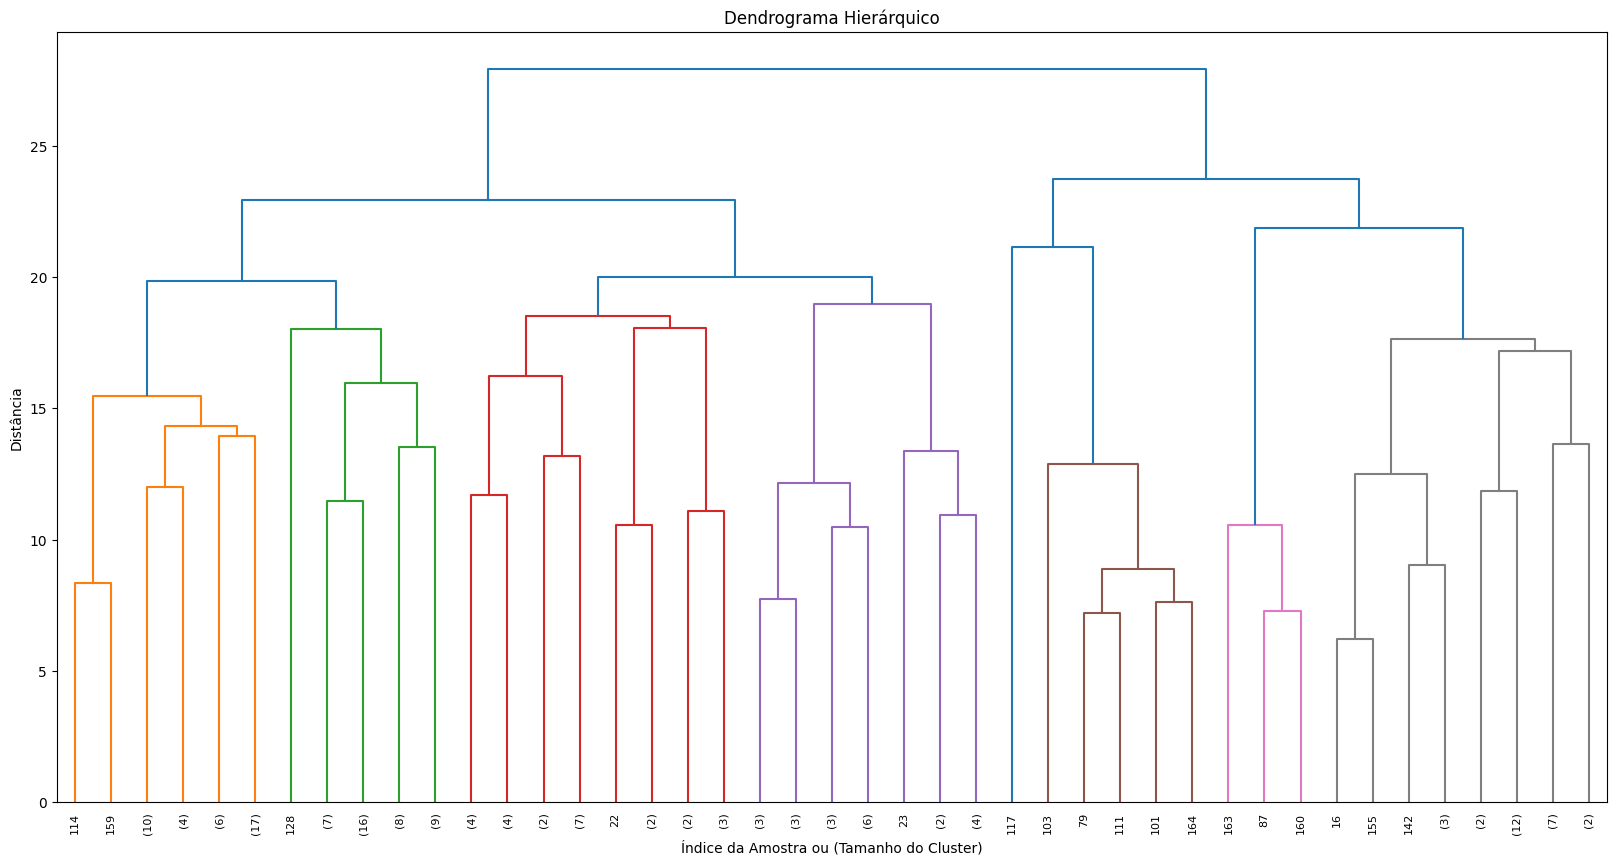

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Selecionar as variáveis para clustering (remover 'Class' se presente)
if 'Class' in data.columns:
    data = data.drop(columns=['Class'])

# Normalizar os dados (opcional, mas geralmente recomendado para clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicação do algoritmo de agrupamento hierárquico
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data_scaled)

# Plotagem do dendrograma
def plot_dendrogram(model, **kwargs):
    # Criação do dendrograma com as configurações necessárias
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Nós de folha contam como 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plota o dendrograma
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(20, 10))  # Aumentar o tamanho da figura
plt.title('Dendrograma Hierárquico')
plot_dendrogram(model, leaf_rotation=90, leaf_font_size=8, truncate_mode='level', p=5)  # Truncar o dendrograma para 5 níveis
plt.xlabel("Índice da Amostra ou (Tamanho do Cluster)")
plt.ylabel("Distância")
plt.show()


O dendrograma é uma representação gráfica da estrutura de agrupamento produzida pelo algoritmo de agrupamento hierárquico. Ele mostra como os elementos individuais são agrupados em clusters, com base em sua similaridade. Vamos examinar os principais pontos:

Eixo X (Índice da Amostra ou Tamanho do Cluster):
O eixo X representa o índice das amostras ou o tamanho dos clusters. À medida que percorremos o eixo da esquerda para a direita, estamos observando a fusão de clusters.

Eixo Y (Distância):
O eixo Y representa a distância entre os clusters. Quanto maior a distância, menos similaridade entre os clusters.

Truncamento do Dendrograma:
O dendrograma foi truncado para mostrar apenas os primeiros 5 níveis de fusão de clusters. Isso ajuda a visualizar os grupos mais relevantes.

Cores e Fusões:
As linhas verticais representam as distâncias nas quais os clusters estão sendo fundidos.
As cores indicam diferentes clusters ou níveis de hierarquia.

Conclusão:
Quanto mais próximo no eixo Y, mais similaridade entre os clusters.
Os clusters mais próximos no dendrograma são os primeiros a serem fundidos, formando grupos maiores.

## Considerações finais

Exploração de Dados:

Demografia e Prevalência: A amostra consiste predominantemente de indivíduos idosos e do sexo masculino, com alta prevalência de cirrose e sintomas associados, como varizes e esplenomegalia. Uma proporção significativa de pacientes consome álcool e tabaco em quantidades consideráveis.
Distribuição dos Desfechos: Aproximadamente 62% dos indivíduos na amostra faleceram, enquanto os restantes sobreviveram, indicando uma significativa prevalência de mortalidade entre os pacientes com as condições estudadas.

Pré-processamento de Dados:

Tratamento de Dados em Falta: Foram identificados e tratados valores em falta nas colunas, garantindo que os modelos pudessem ser treinados sem interferências de dados incompletos.
Conversão e Normalização: As colunas foram adequadamente convertidas para tipos numéricos e normalizadas quando necessário, facilitando a comparação e análise dos dados.
Codificação de Variáveis Categóricas: Utilizou-se o LabelEncoder para converter variáveis categóricas em numéricas, permitindo que os modelos pudessem trabalhar corretamente com esses dados.

Análise de Outliers:

Identificação e Transformação: Foram identificadas colunas com possíveis outliers, como ALP, AFP, Leucocytes, GGT e Dir_Bil. Aplicou-se transformação logarítmica para mitigar o impacto desses outliers.

Modelagem e Avaliação:

Random Forest: Apresentou o melhor desempenho, com alta taxa de acerto e nenhum erro significativo, sendo o modelo mais robusto para esta tarefa.
KNN: Mostrou desempenho promissor, embora com alguns falsos negativos que precisam ser considerados.
Gradient Boosting e Regressão Logística: Ambos apresentaram desempenho razoável, com alguns verdadeiros positivos e poucos falsos negativos.
MLP: O MLP teve um desempenho inferior, com maior quantidade de falsos negativos, indicando a necessidade de ajustes.
Decision Tree: Desempenho moderado, simples de interpretar mas menos eficaz comparado aos ensembles.
Stacking Classifier: Combinou os pontos fortes de múltiplos modelos, apresentando um bom equilíbrio entre precisão e robustez.

Ajuste de Hiperparâmetros:

Utilizou-se o GridSearchCV para otimizar os hiperparâmetros dos modelos, assegurando que o melhor conjunto de parâmetros fosse utilizado para cada modelo. Por exemplo, no caso do Random Forest, foram ajustados parâmetros como o número de estimadores (n_estimators) e a profundidade máxima das árvores (max_depth)

Importância das Variáveis:

Variáveis como ALP e AFP destacaram-se como importantes diferenciadoras entre os pacientes que sobreviveram e os que não sobreviveram, sendo cruciais para a precisão dos modelos.

Desafios e Limitações:

Dados em Falta e Outliers: O tratamento de dados em falta e outliers foi um desafio significativo. Embora tenham sido feitos esforços para mitigar esses problemas, eles ainda podem ter impactado os resultados.
Desbalanceamento de Classes: O desbalanceamento das classes 'Vive' e 'Morre' foi abordado com técnicas como SMOTE, mas ainda assim, o desbalanceamento pode ter influenciado a performance de alguns modelos. Algumas possíveis influências incluem:
- Overfitting: A criação de dados sintéticos pode levar ao overfitting, onde o modelo aprende bem os dados de treino mas não generaliza bem para novos dados.
- Complexidade do Modelo: Alguns modelos podem ser mais sensíveis ao desbalanceamento e, mesmo com SMOTE, podem não alcançar a performance desejada em prever a classe minoritária.